In [98]:
print('hello')

hello


In [2]:
import numpy as np
import pandas as pd

In [3]:
import chardet

# look at the first 100k bytes to guess the character encoding
with open("Sample-Superstore.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))

# check what the character encoding might be
print(result)

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


In [4]:
superstore = pd.read_csv('Sample-Superstore.csv', encoding='latin1')

In [5]:
# Check for duplicate rows
duplicate_rows = superstore.duplicated()
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

# Optionally, display the duplicate rows
if duplicate_rows.sum() > 0:
    print(superstore[duplicate_rows])

Number of duplicate rows: 0


#checking if the customer ids have consisten ship mode

In [157]:
import pandas as pd

#checking if segments
# Assuming your dataframe is named 'df_full'
# Replace 'df_full' with your actual dataframe name if it's different

# First, group by Customer ID and get unique segments
ship_per_customer = superstore.groupby('Order ID')['Ship Mode'].nunique()

# Check if there are any Customer IDs with more than one unique segment
conflicting_customers = ship_per_customer[ship_per_customer > 1]

if conflicting_customers.empty:
    print("All customers have consistent ship mode.")
else:
    print("Customers with conflicting ship mode:")
    print(conflicting_customers)

All customers have consistent ship mode.


# create unique codes

In [158]:
import uuid

data = superstore
df = pd.DataFrame(data)

# Function to generate unique IDs based on other two columns
def generate_unique_id(row):
  # Generate a UUID
    return f"{row['Customer ID']}_{row['Region']}_{row['State']}_{row['City']}_{row['Postal Code']}"

# Apply the function to create the new column
df['Address_ID'] = df.apply(generate_unique_id, axis=1)

print(df)

      Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
1          2  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
2          3  CA-2016-138688   6/12/2016   6/16/2016    Second Class   
3          4  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
4          5  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
...      ...             ...         ...         ...             ...   
9989    9990  CA-2014-110422   1/21/2014   1/23/2014    Second Class   
9990    9991  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9991    9992  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9992    9993  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9993    9994  CA-2017-119914    5/4/2017    5/9/2017    Second Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       Claire Gute   Consumer  United 

In [161]:
df['Address_ID'].value_counts()

Address_ID
SV-20365_East_New York_New York City_10035       14
SC-20770_East_Pennsylvania_Philadelphia_19134    12
AC-10615_East_New York_New York City_10009       12
PP-18955_South_Georgia_Smyrna_30080              11
WB-21850_West_California_Anaheim_92804           11
                                                 ..
AS-10240_West_California_Redondo Beach_90278      1
CS-12250_Central_Texas_Haltom City_76117          1
PG-18820_South_Kentucky_Louisville_40214          1
SM-20320_Central_Indiana_Lafayette_47905          1
CC-12220_West_California_Westminster_92683        1
Name: count, Length: 4910, dtype: int64

In [162]:
# Sample DataFrame
import uuid

# Function to generate unique IDs based on other two columns
def generate_unique_id(row):
    unique_id = uuid.uuid4()  # Generate a UUID
    return f"{row['Order ID']}_{row['Product ID']}_{row['Customer ID']}{unique_id}"

# Apply the function to create the new column
df['Order_Product_ID'] = df.apply(generate_unique_id, axis=1)

print(df)

      Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
1          2  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
2          3  CA-2016-138688   6/12/2016   6/16/2016    Second Class   
3          4  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
4          5  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
...      ...             ...         ...         ...             ...   
9989    9990  CA-2014-110422   1/21/2014   1/23/2014    Second Class   
9990    9991  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9991    9992  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9992    9993  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9993    9994  CA-2017-119914    5/4/2017    5/9/2017    Second Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       Claire Gute   Consumer  United 

In [164]:
df['Order_Product_ID'].value_counts()

Order_Product_ID
CA-2016-152156_FUR-BO-10001798_CG-12520eb35a34b-8646-4fbd-934b-e361433ae2da    1
CA-2016-115483_OFF-PA-10001497_JS-15880695c02d1-7a71-45e1-9d96-31fea1da9564    1
CA-2017-135937_FUR-FU-10002253_KM-163757861e7a3-7fd6-4cad-86ce-a10fd460f3b9    1
CA-2017-135937_FUR-TA-10001039_KM-16375f770eb4e-ca55-4088-8e7a-0ca55bffe3a6    1
CA-2015-129322_OFF-AR-10004587_DB-13405b8d0a2ee-9e74-44f8-a3da-9f91570af4bf    1
                                                                              ..
CA-2017-122595_TEC-PH-10003095_GM-14455bd3c4f43-9b44-41d4-bbdc-8cf4f9d16c37    1
CA-2017-122595_FUR-FU-10002963_GM-1445583ce9ab0-869a-4e0c-aa49-5c28778be826    1
US-2017-109253_OFF-AR-10000203_PR-18880f66a0da7-bc29-4e0e-8d91-2630d8a68416    1
US-2017-109253_TEC-PH-10004667_PR-18880f203129c-a517-4a69-8ded-cbe535ee2f88    1
CA-2017-119914_OFF-AP-10002684_CC-122204f766a40-b72a-4f5f-8e4e-3d5e99c050ed    1
Name: count, Length: 9994, dtype: int64

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Row ID            9994 non-null   int64  
 1   Order ID          9994 non-null   object 
 2   Order Date        9994 non-null   object 
 3   Ship Date         9994 non-null   object 
 4   Ship Mode         9994 non-null   object 
 5   Customer ID       9994 non-null   object 
 6   Customer Name     9994 non-null   object 
 7   Segment           9994 non-null   object 
 8   Country           9994 non-null   object 
 9   City              9994 non-null   object 
 10  State             9994 non-null   object 
 11  Postal Code       9994 non-null   int64  
 12  Region            9994 non-null   object 
 13  Product ID        9994 non-null   object 
 14  Category          9994 non-null   object 
 15  Sub-Category      9994 non-null   object 
 16  Product Name      9994 non-null   object 


In [167]:
import pandas as pd

# Load the data into a pandas DataFrame
data = df # Replace "your_data.csv" with the path to your CSV file

# Calculate the cost price (price at which you bought the product)
data["Cost Price"] = (data["Sales"] / (1 - data["Discount"])) - (data["Profit"] / data["Quantity"])

# Calculate the actual price of the product (real price)
data["Actual Price"] = data["Sales"] / data["Quantity"]

# Display the DataFrame with the added columns
print(data.head())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Sub-Category                                       Product Name     Sales  \
0    Bookcase

In [210]:
import pandas as pd

# Load the data into a pandas DataFrame
data = df
# 1. Total Revenue
total_revenue = data["Sales"].sum()

# 2. Total Profit
total_profit = data["Profit"].sum()

# 3. Total Quantity Sold
total_quantity_sold = data["Quantity"].sum()

# 4. Average Selling Price
average_selling_price = total_revenue / total_quantity_sold

# 5. Profit Margin
profit_margin = (total_profit / total_revenue) * 100

# 6. Discount Analysis
total_discount_amount = data["Sales"].sum() - data["Actual Price"].sum()
percentage_sales_with_discount = (len(data[data["Discount"] > 0]) / len(data)) * 100
# Effect of discounts on profit margin can be calculated by comparing profit margin with and without discounts

# 7. Product-wise Analysis
product_analysis = data.groupby("Sub-Category").agg(
    Total_Revenue=("Sales", "sum"),
    Total_Profit=("Profit", "sum"),
    Average_Selling_Price=("Sales", "mean"),
    Profit_Margin=("Profit", lambda x: (x.sum() / data["Sales"].sum()) * 100)
)

# 8. Customer-wise Analysis
customer_analysis = data.groupby("Customer ID").agg(
    Total_Purchase_Amount=("Sales", "sum"),
    Average_Discount_Rate=("Discount", "mean"),
    Total_Profit=("Profit", "sum")
)

# 9. Time-based Analysis
data["Order Date"] = pd.to_datetime(data["Order Date"])
data["Month"] = data["Order Date"].dt.month
data["Year"] = data["Order Date"].dt.year
data["ShipMonth"] = data["Ship Date"].dt.month
data["ShipYear"] = data["Ship Date"].dt.year
time_analysis = data.groupby("Month").agg(
    Total_Revenue=("Sales", "sum"),
    Total_Profit=("Profit", "sum")
)

# 10. Region-wise Analysis
region_analysis = data.groupby("Region").agg(
    Total_Revenue=("Sales", "sum"),
    Total_Profit=("Profit", "sum")
)

# Display the results
print("1. Total Revenue:", total_revenue)
print("2. Total Profit:", total_profit)
print("3. Total Quantity Sold:", total_quantity_sold)
print("4. Average Selling Price:", average_selling_price)
print("5. Profit Margin:", profit_margin)
print("6. Total Discount Amount:", total_discount_amount)
print("   Percentage of Sales with Discount:", percentage_sales_with_discount)
print("\n7. Product-wise Analysis:")
print(product_analysis)
print("\n8. Customer-wise Analysis:")
print(customer_analysis)
print("\n9. Time-based Analysis:")
print(time_analysis)
print("\n10. Region-wise Analysis:")
print(region_analysis)

1. Total Revenue: 2297200.8603000003
2. Total Profit: 286397.0217
3. Total Quantity Sold: 37873
4. Average Selling Price: 60.65537085258628
5. Profit Margin: 12.467217240315604
6. Total Discount Amount: 1688370.6872000003
   Percentage of Sales with Discount: 51.9911947168301

7. Product-wise Analysis:
              Total_Revenue  Total_Profit  Average_Selling_Price  \
Sub-Category                                                       
Accessories     167380.3180    41936.6357             215.974604   
Appliances      107532.1610    18138.0054             230.755710   
Art              27118.7920     6527.7870              34.068834   
Binders         203412.7330    30221.7633             133.560560   
Bookcases       114879.9963    -3472.5560             503.859633   
Chairs          328449.1030    26590.1663             532.332420   
Copiers         149528.0300    55617.8249            2198.941618   
Envelopes        16476.4020     6964.1767              64.867724   
Fasteners       

# separating the df into smaller sets

In [110]:
customer_location=superstore[['Country', 'City', 'State', 'Postal Code', 'Region']]

In [111]:
product=[['Product ID', 'Category', 'Sub-Category', 'Product Name']]

In [112]:
Orders=superstore[['Order ID', 'Order Date', 'Customer ID', 'Address ID']]

In [113]:
shipment=superstore[['Order ID' , 'Ship Date', 'Ship Mode']]

In [114]:
customer=superstore[['Customer ID', 'Customer Name', 'Segment']]

# checking for null values

In [115]:
superstore.isnull()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Unique_ID
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9990,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9991,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9992,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# checking for NA values

In [116]:
superstore.isna()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Unique_ID
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9990,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9991,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9992,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# checking for duplicates

In [117]:
df = pd.DataFrame(superstore)

# Check for duplicates
duplicates = df[df.duplicated()]
if not duplicates.empty:
    print("Duplicates found in the DataFrame:")
    print(duplicates)
else:
    print("No duplicates found in the DataFrame.")

No duplicates found in the DataFrame.


Data Types:
Row ID                       int64
Order ID                    object
Order Date          datetime64[ns]
Ship Date           datetime64[ns]
Ship Mode                   object
Customer ID                 object
Customer Name               object
Segment                     object
Country                     object
City                        object
State                       object
Postal Code                  int64
Region                      object
Product ID                  object
Category                    object
Sub-Category                object
Product Name                object
Sales                      float64
Quantity                     int64
Discount                   float64
Profit                     float64
Address_ID                  object
Order_Product_ID            object
Cost Price                 float64
Actual Price               float64
Month                        int32
Profit Margin              float64
Days to Ship                 int64
Year    

C:\Users\gabb_\AppData\Local\Temp\ipykernel_18824\1539055382.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Category', y='Sales', data=data, estimator=np.sum, ci=None)


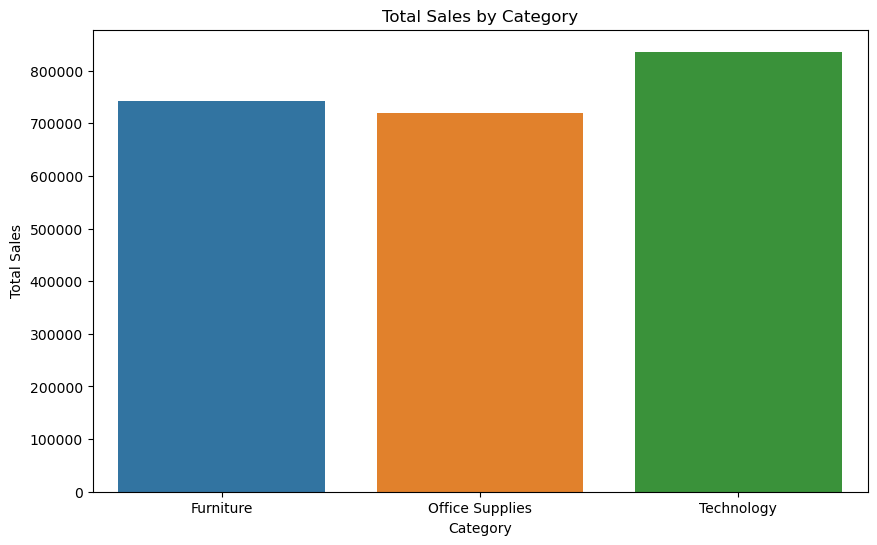

C:\Users\gabb_\AppData\Local\Temp\ipykernel_18824\1539055382.py:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sub-Category', y='Profit', data=data, estimator=np.sum, ci=None)


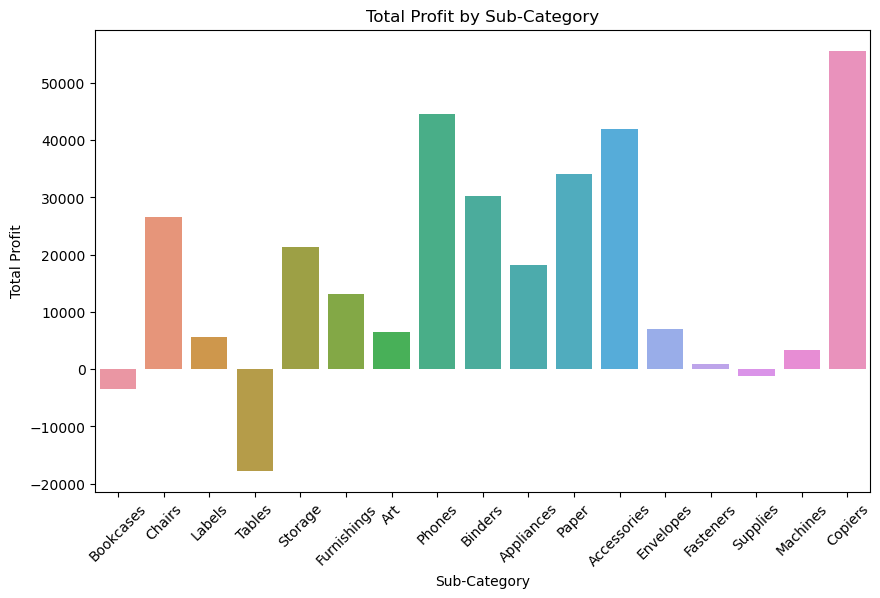

C:\Users\gabb_\AppData\Local\Temp\ipykernel_18824\1539055382.py:46: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sub-Category', y='Sales', data=data, estimator=np.sum, ci=None)


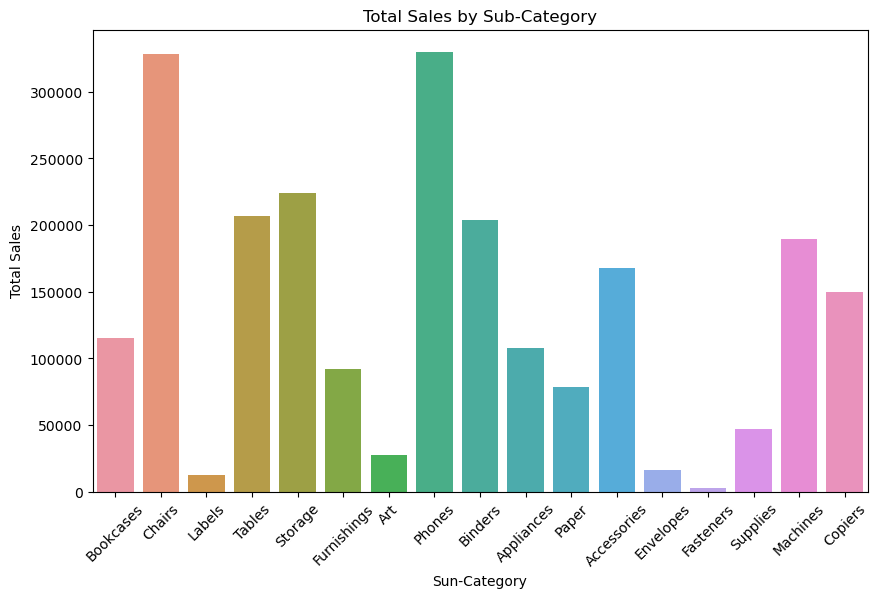

C:\Users\gabb_\AppData\Local\Temp\ipykernel_18824\1539055382.py:55: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sub-Category', y='Quantity', data=data, estimator=np.sum, ci=None)


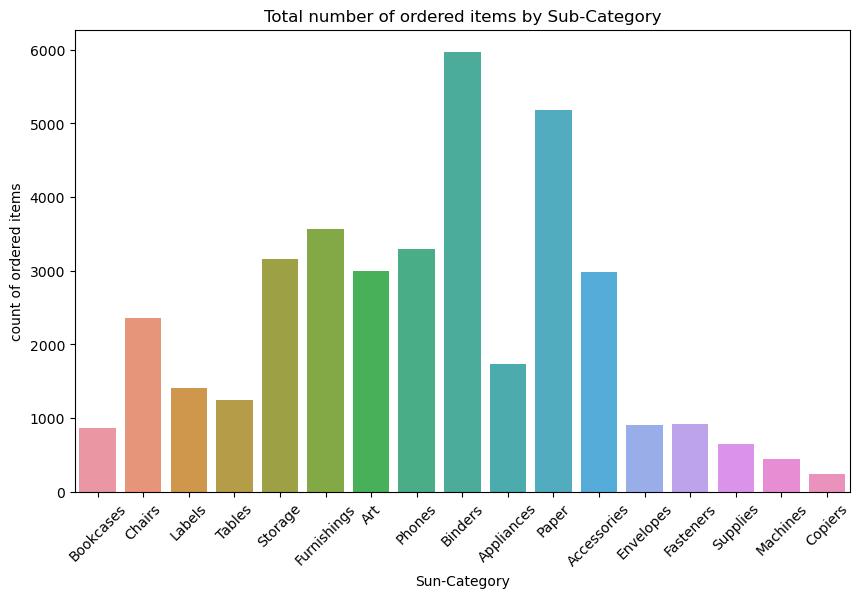

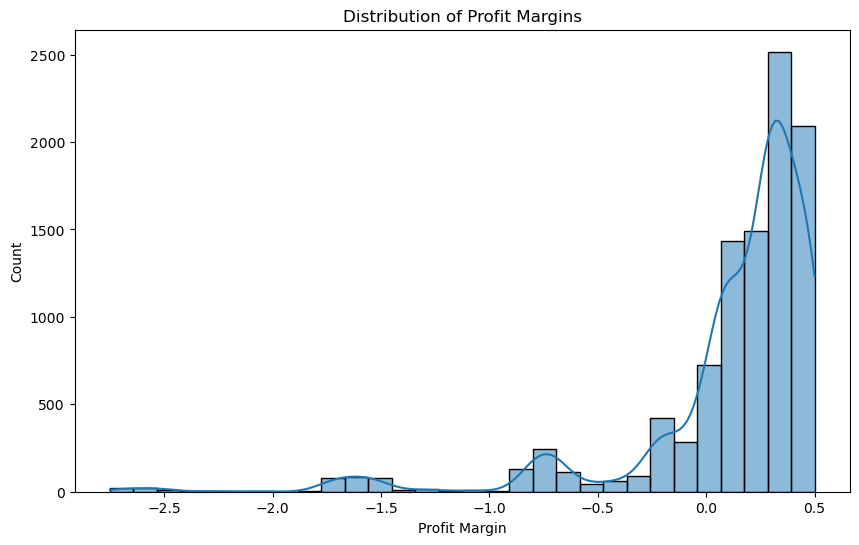

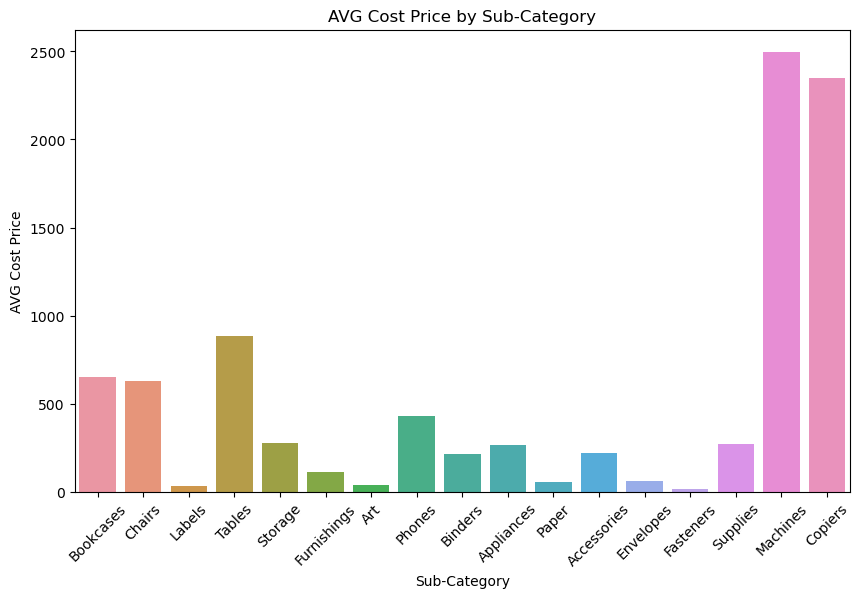

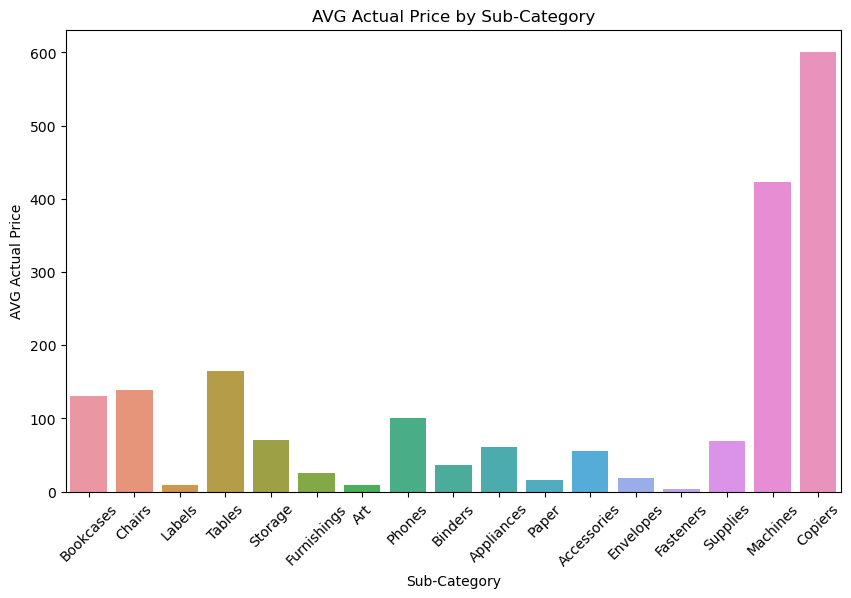

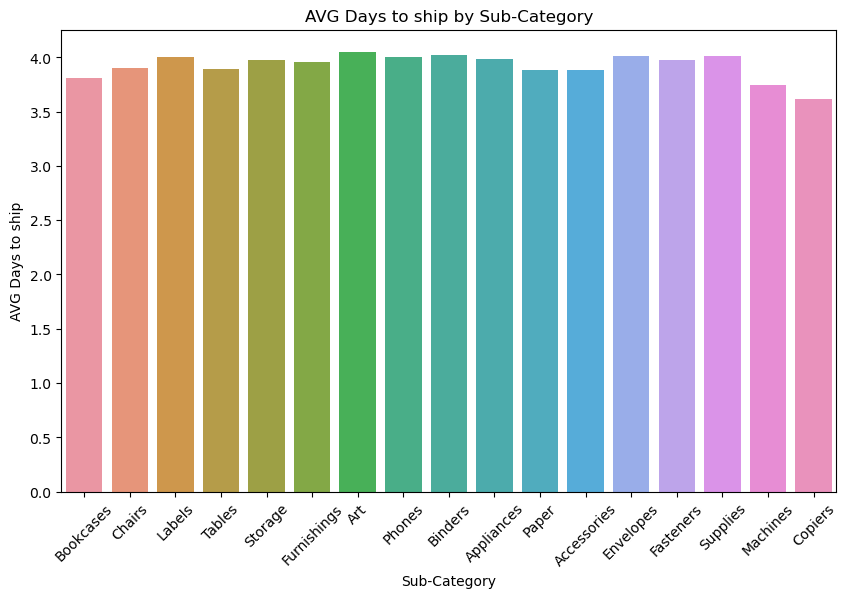

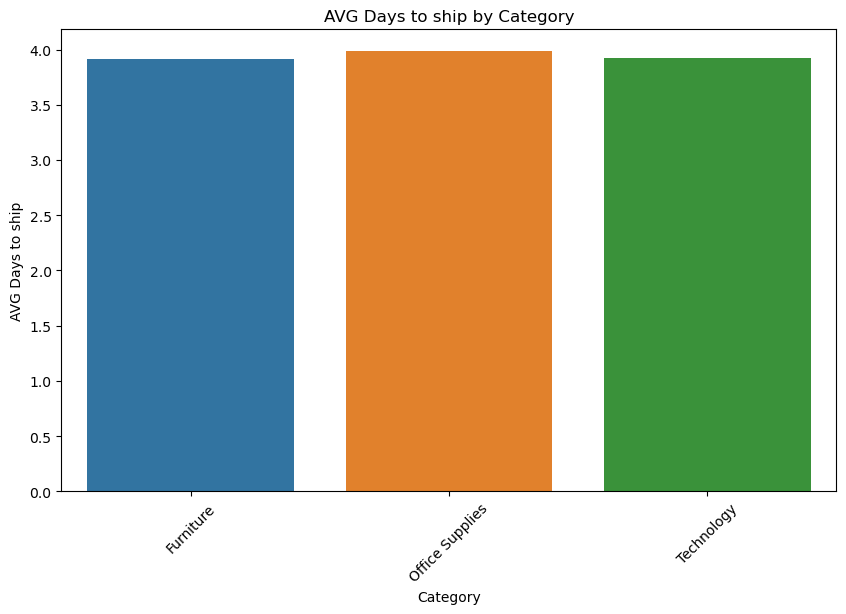

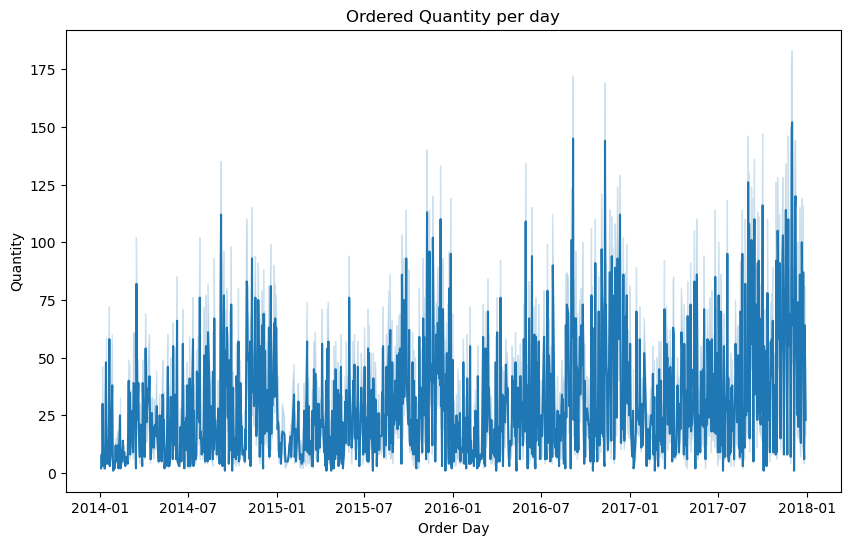

In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data

data = df

# Basic Analysis
print("Data Types:")
print(data.dtypes)
print("\nSummary Statistics:")
print(data.describe())
print("\nMissing Values:")
print(data.isnull().sum())

# Create Additional Columns
# Adding a 'Profit Margin' column
data['Profit Margin'] = data['Profit'] / data['Sales']

# Adding a 'Days to Ship' column
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])
data['Days to Ship'] = (data['Ship Date'] - data['Order Date']).dt.days

# Visualization: Sales by Category
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Sales', data=data, estimator=np.sum, ci=None)
plt.title('Total Sales by Category')
plt.ylabel('Total Sales')
plt.xlabel('Category')
plt.show()

# Visualization: Profit by Category
plt.figure(figsize=(10, 6))
sns.barplot(x='Sub-Category', y='Profit', data=data, estimator=np.sum, ci=None)
plt.title('Total Profit by Sub-Category')
plt.ylabel('Total Profit')
plt.xlabel('Sub-Category')
plt.xticks(rotation=45)
plt.show()

# Visualization: Sales by SubCategory
plt.figure(figsize=(10, 6))
sns.barplot(x='Sub-Category', y='Sales', data=data, estimator=np.sum, ci=None)
plt.title('Total Sales by Sub-Category')
plt.ylabel('Total Sales')
plt.xlabel('Sun-Category')
plt.xticks(rotation=45)
plt.show()

# Visualization: Quantity by SubCategory
plt.figure(figsize=(10, 6))
sns.barplot(x='Sub-Category', y='Quantity', data=data, estimator=np.sum, ci=None)
plt.title('Total number of ordered items by Sub-Category')
plt.ylabel('count of ordered items')
plt.xlabel('Sun-Category')
plt.xticks(rotation=45)
plt.show()

# Visualization: Profit Margin Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Profit Margin'].dropna(), kde=True, bins=30)
plt.title('Distribution of Profit Margins')
plt.xlabel('Profit Margin')
plt.show()

# Visualization: AVG Cost Price by SubCategory
plt.figure(figsize=(10, 6))
sns.barplot(x='Sub-Category', y='Cost Price', data=data, estimator=np.mean, errorbar=None)
plt.title('AVG Cost Price by Sub-Category')
plt.ylabel('AVG Cost Price')
plt.xlabel('Sub-Category')
plt.xticks(rotation=45)
plt.show()

# Visualization: AVG Actual Price by SubCategory
plt.figure(figsize=(10, 6))
sns.barplot(x='Sub-Category', y='Actual Price', data=data, estimator=np.mean, errorbar=None)
plt.title('AVG Actual Price by Sub-Category')
plt.ylabel('AVG Actual Price')
plt.xlabel('Sub-Category')
plt.xticks(rotation=45)
plt.show()


# Visualization: AVG Days to ship by SubCategory
plt.figure(figsize=(10, 6))
sns.barplot(x='Sub-Category', y='Days to Ship', data=data, estimator=np.mean, errorbar=None)
plt.title('AVG Days to ship by Sub-Category')
plt.ylabel('AVG Days to ship')
plt.xlabel('Sub-Category')
plt.xticks(rotation=45)
plt.show()


# Visualization: AVG Days to ship by Category
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Days to Ship', data=data, estimator=np.mean, errorbar=None)
plt.title('AVG Days to ship by Category')
plt.ylabel('AVG Days to ship')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.show()


# Visualization: AVG Days to ship by Category
plt.figure(figsize=(10, 6))
sns.lineplot(x='Order Date', y='Quantity', data=data, estimator=np.sum)
plt.title('Ordered Quantity per day')
plt.ylabel('Quantity')
plt.xlabel('Order Day')
#plt.xticks(rotation=45)
plt.show()


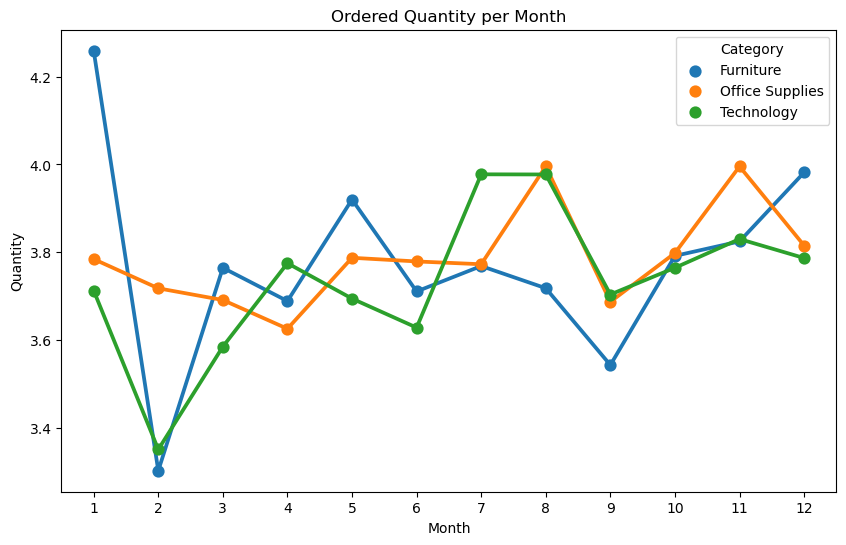

In [198]:
# Visualization: AVG Quantity per Month
plt.figure(figsize=(10, 6))
sns.pointplot(x='Month', y='Quantity', data=data, hue='Category', errorbar=None)
plt.title('Ordered Quantity per Month')
plt.ylabel('Quantity')
plt.xlabel('Month')
#plt.xticks(rotation=45)
plt.show()

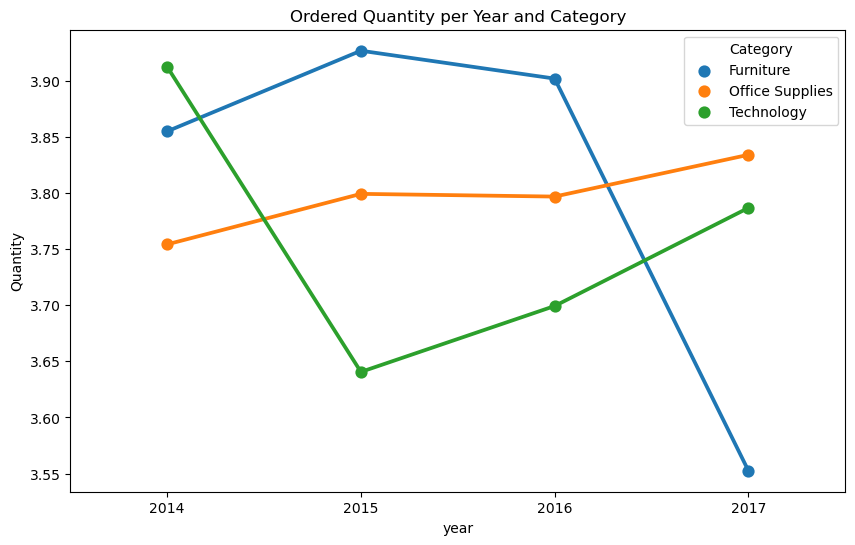

In [201]:
# Visualization: AVG Quantity per Year
plt.figure(figsize=(10, 6))
sns.pointplot(x='Year', y='Quantity', data=data, hue='Category', errorbar=None)
plt.title('Ordered Quantity per Year and Category')
plt.ylabel('Quantity')
plt.xlabel('year')
#plt.xticks(rotation=45)
plt.show()

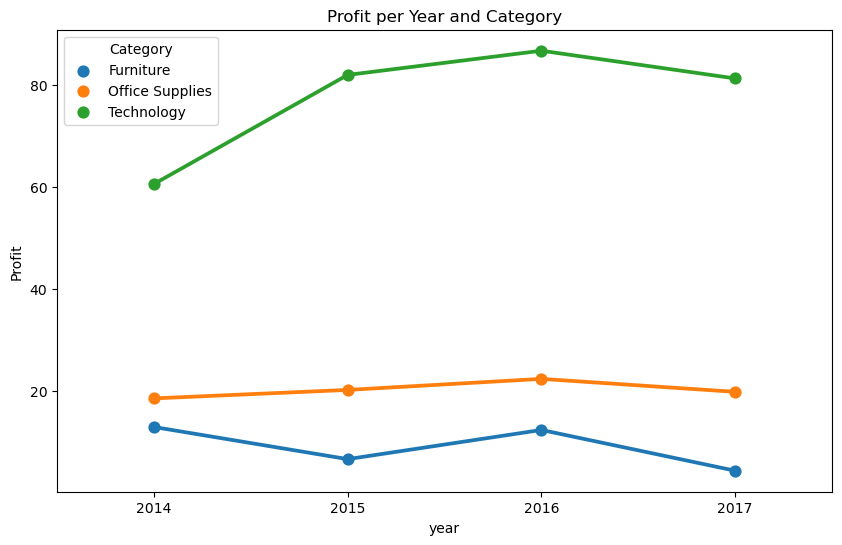

In [202]:
# Visualization: AVG Quantity per Year
plt.figure(figsize=(10, 6))
sns.pointplot(x='Year', y='Profit', data=data, hue='Category', errorbar=None)
plt.title('Profit per Year and Category')
plt.ylabel('Profit')
plt.xlabel('year')
#plt.xticks(rotation=45)
plt.show()

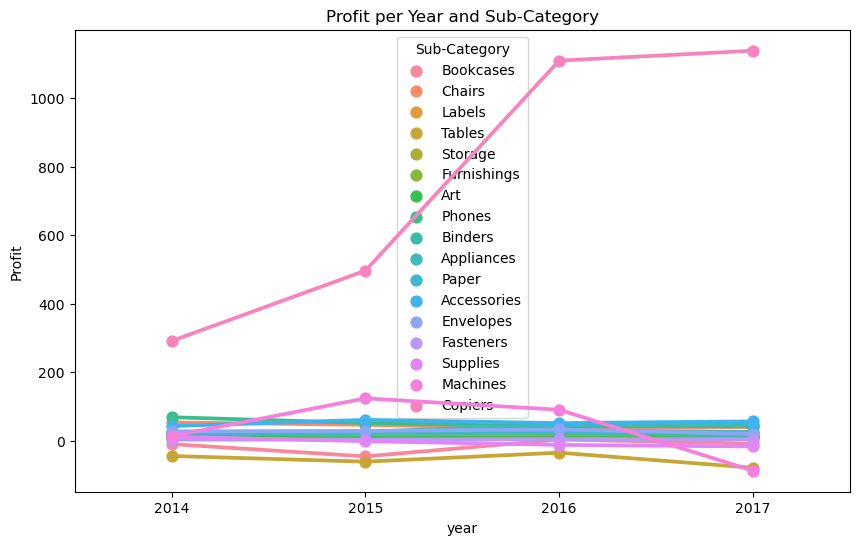

In [203]:
# Visualization: AVG Quantity per Year
plt.figure(figsize=(10, 6))
sns.pointplot(x='Year', y='Profit', data=data, hue='Sub-Category', errorbar=None)
plt.title('Profit per Year and Sub-Category')
plt.ylabel('Profit')
plt.xlabel('year')
#plt.xticks(rotation=45)
plt.show()

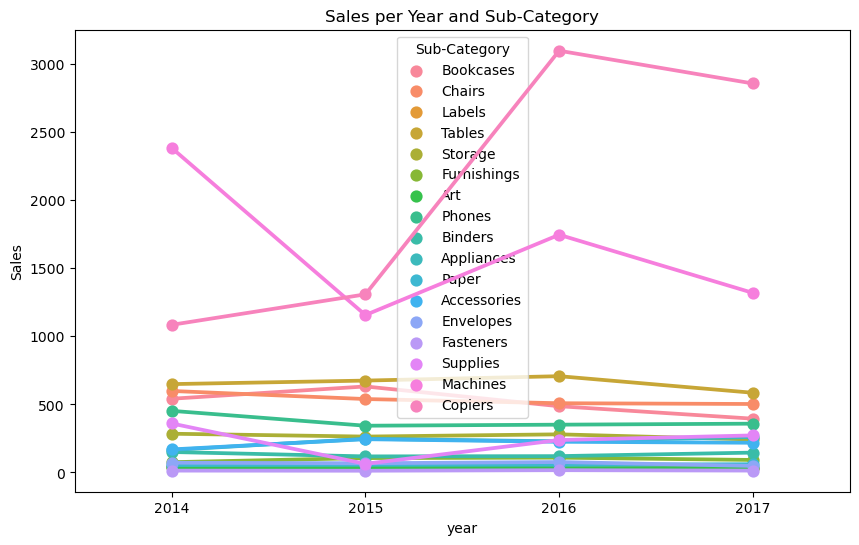

In [205]:
# Visualization: Sales per year and sub-category
plt.figure(figsize=(10, 6))
sns.pointplot(x='Year', y='Sales', data=data, hue='Sub-Category', errorbar=None)
plt.title('Sales per Year and Sub-Category')
plt.ylabel('Sales')
plt.xlabel('year')
#plt.xticks(rotation=45)
plt.show()

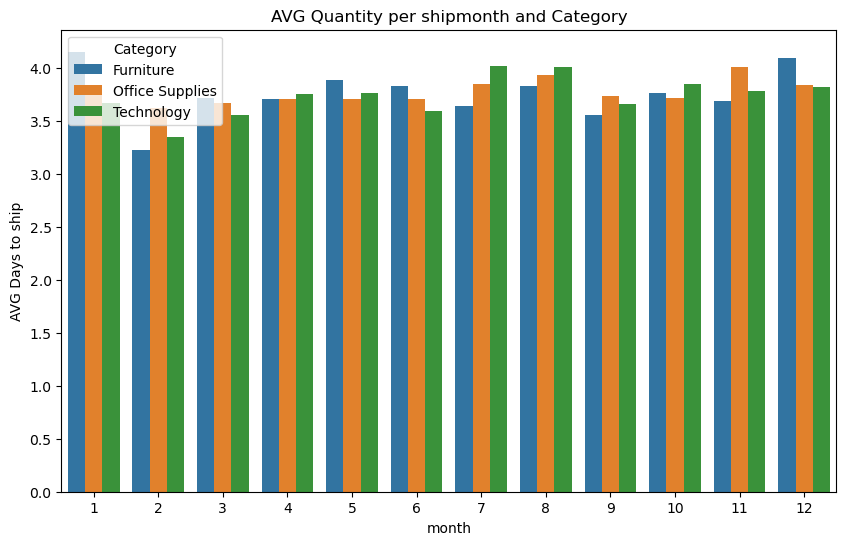

In [214]:
# Visualization: AVG Quantity per shipmonth and category
plt.figure(figsize=(10, 6))
sns.barplot(x='ShipMonth', y='Quantity', data=data, hue='Category',estimator=np.mean, errorbar=None)
plt.title('AVG Quantity per shipmonth and Category')
plt.ylabel('AVG Days to ship')
plt.xlabel('month')
#plt.xticks(rotation=45)
plt.show()

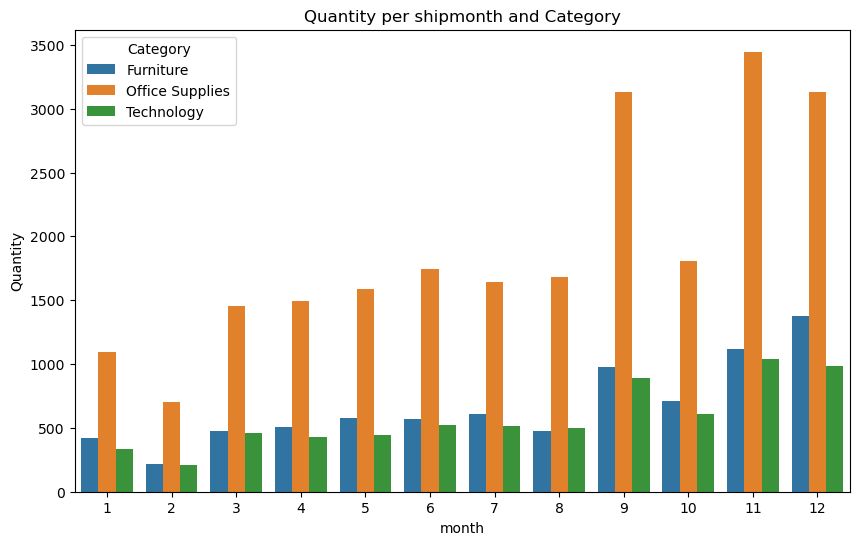

In [213]:
# Visualization: AVG Quantity per shipmonth and category
plt.figure(figsize=(10, 6))
sns.barplot(x='ShipMonth', y='Quantity', data=data, hue='Category',estimator=np.sum, errorbar=None)
plt.title('Quantity per shipmonth and Category')
plt.ylabel('Quantity')
plt.xlabel('month')
#plt.xticks(rotation=45)
plt.show()

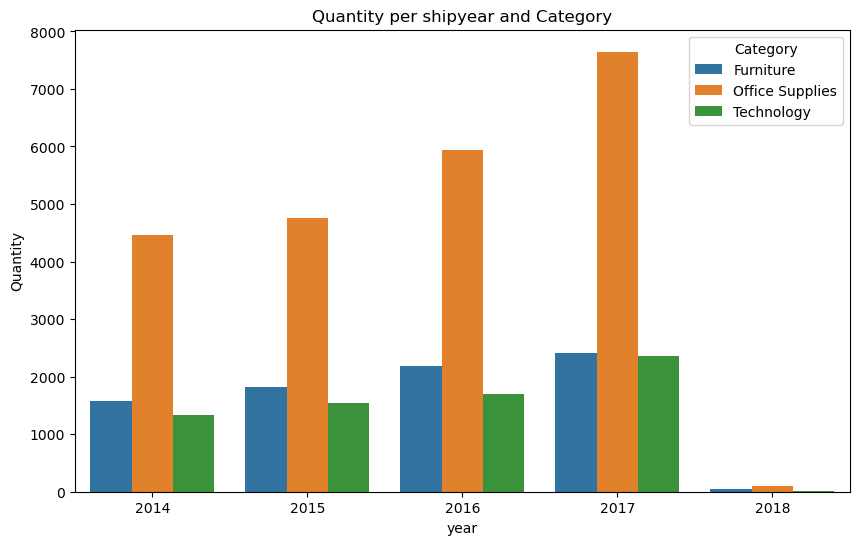

In [217]:
# Visualization: AVG Quantity per shipmonth and category
plt.figure(figsize=(10, 6))
sns.barplot(x='ShipYear', y='Quantity', data=data, hue='Category',estimator=np.sum, errorbar=None)
plt.title('Quantity per shipyear and Category')
plt.ylabel('Quantity')
plt.xlabel('year')
#plt.xticks(rotation=45)
plt.show()

In [221]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Address_ID',
       'Order_Product_ID', 'Cost Price', 'Actual Price', 'Month',
       'Profit Margin', 'Days to Ship', 'Year', 'ShipMonth', 'ShipYear'],
      dtype='object')

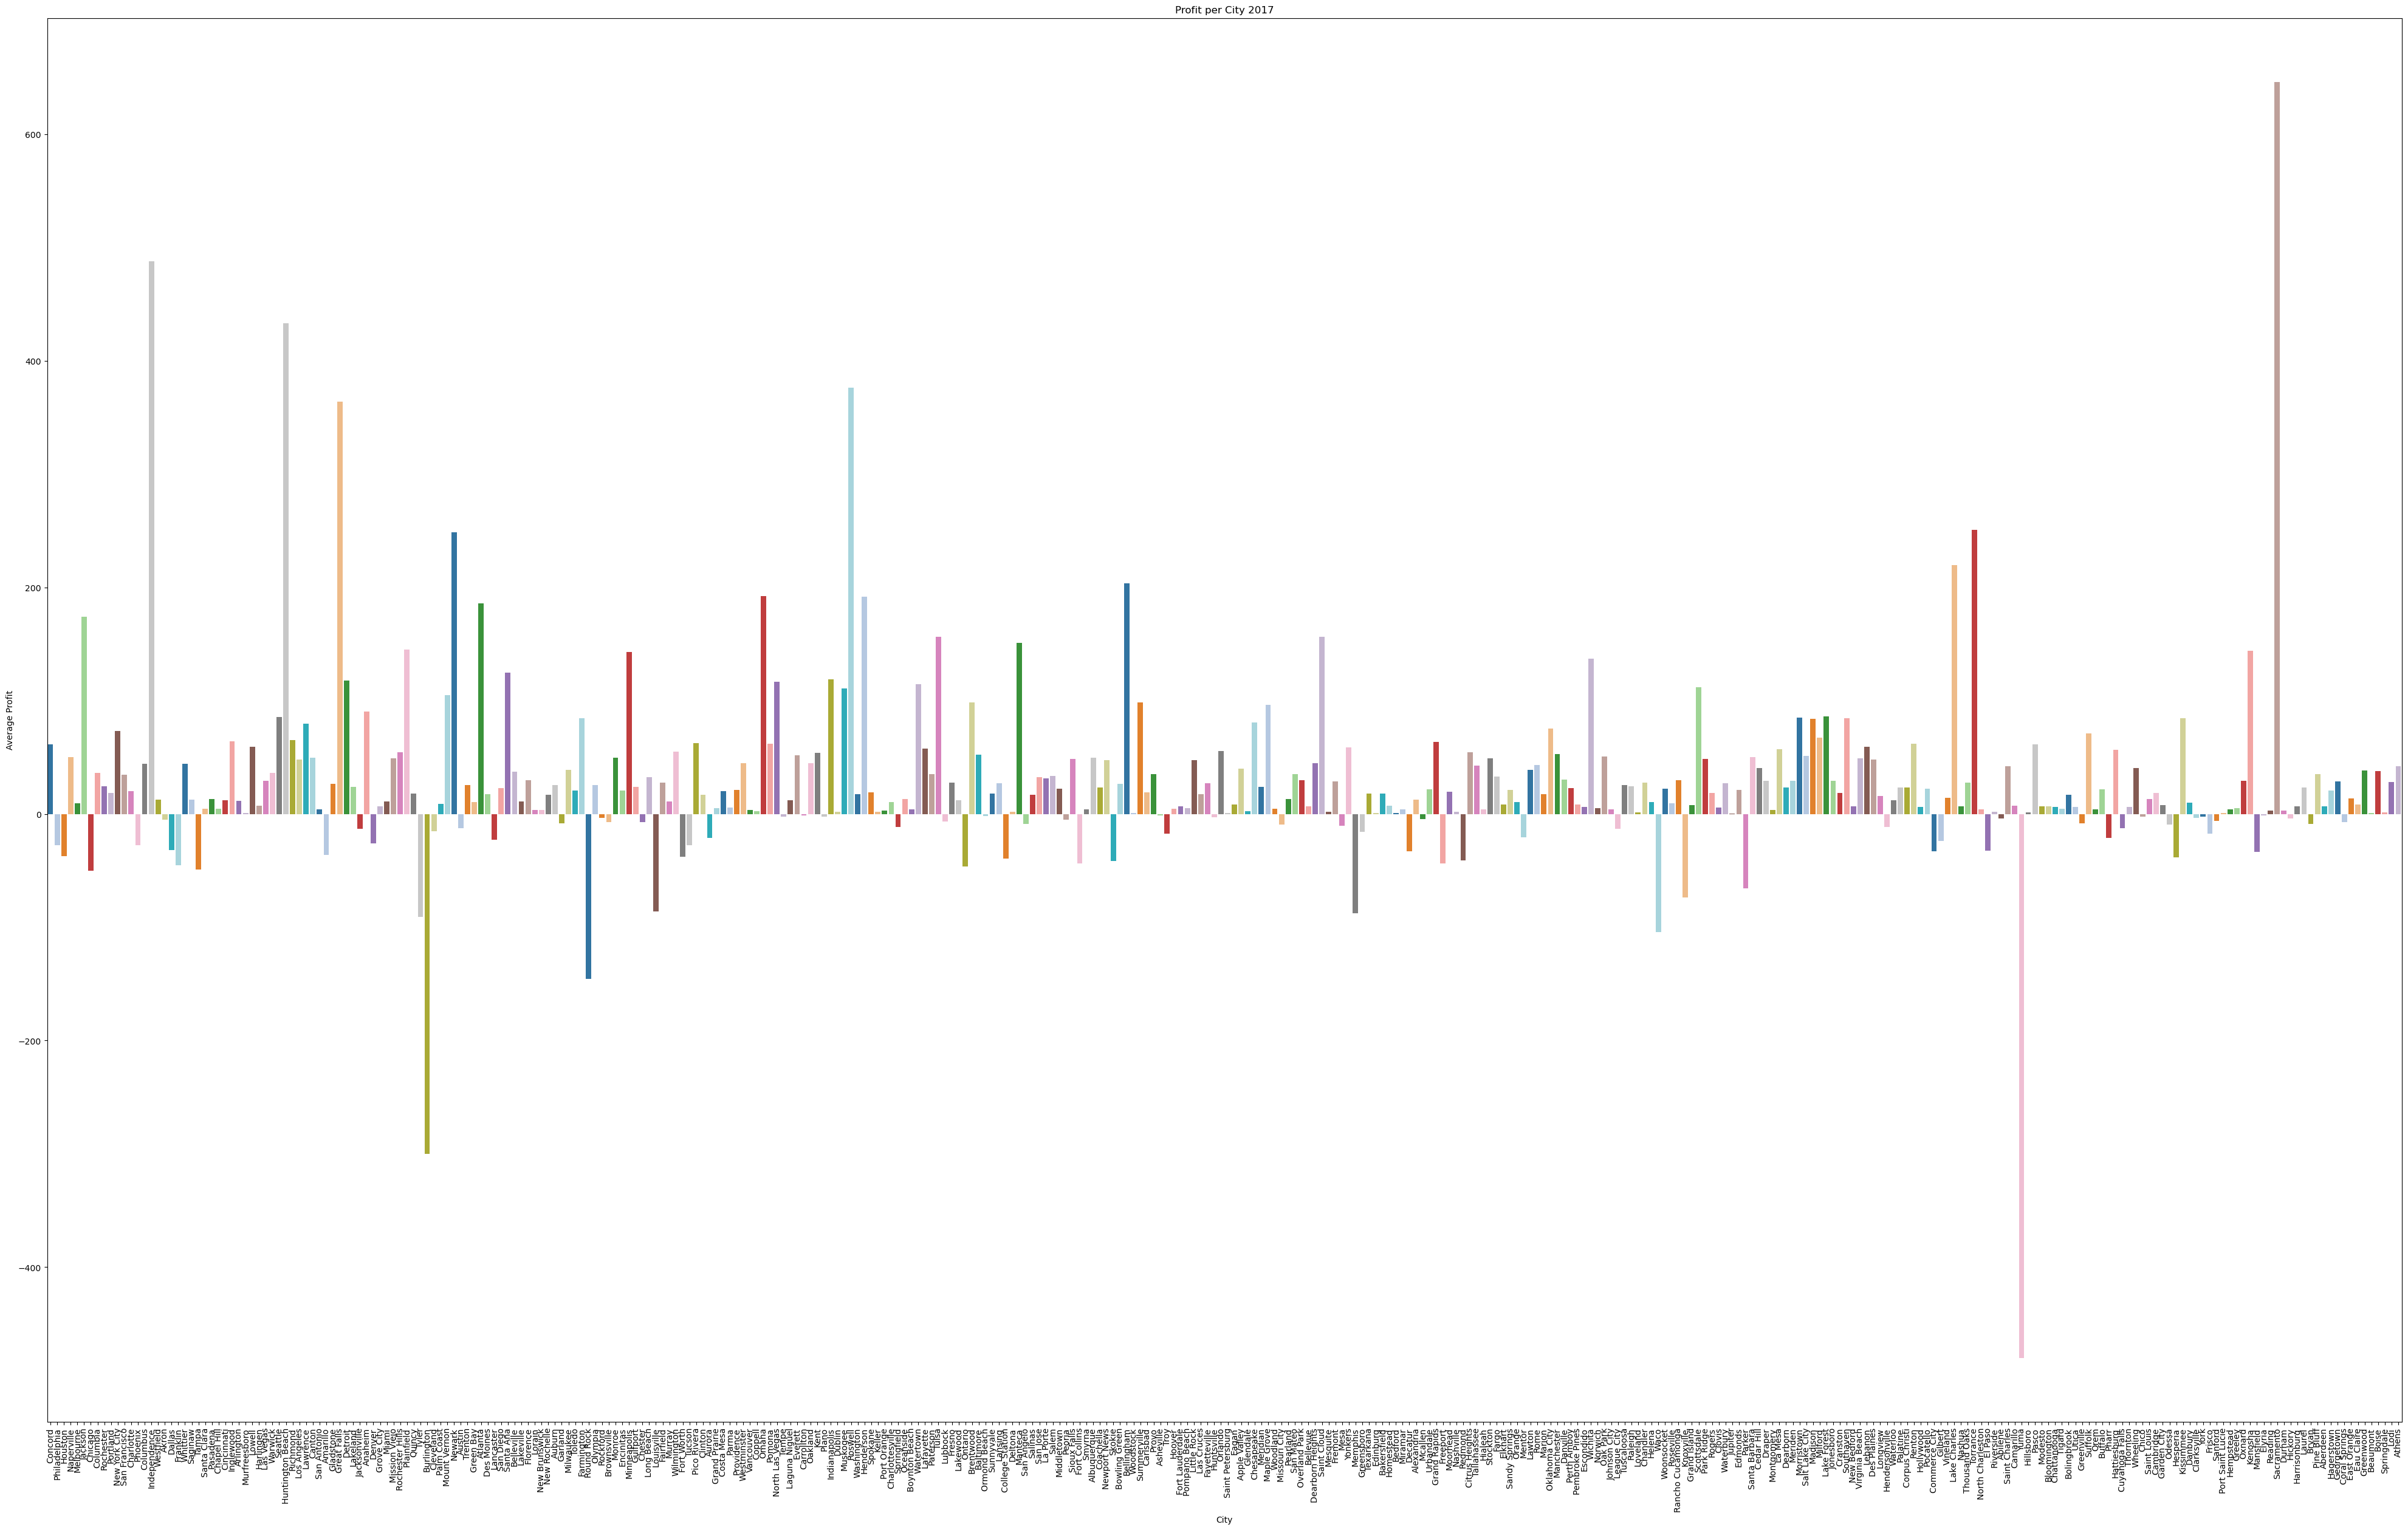

In [245]:
def plot_profit_per_city(data, year):
    """
    Plots the average profit per city for a specified year.

    Parameters:
    - data (DataFrame): The dataset containing the sales data.
    - year (int): The year for which the profit per city is to be plotted.

    Returns:
    - None: Displays a matplotlib plot.
    """
    # Filter data for the specified year
    data_year = data[data['Year'] == year]

    # Plotting
    plt.figure(figsize=(50, 30))
    sns.barplot(x='City', y='Profit', data=data_year, estimator=np.mean, errorbar=None, palette='tab20')
    plt.title(f'Profit per City {year}')
    plt.ylabel('Average Profit')
    plt.xlabel('City')
    plt.xticks(rotation=90)
    plt.show()

# Example usage:
plot_profit_per_city(data, 2017)

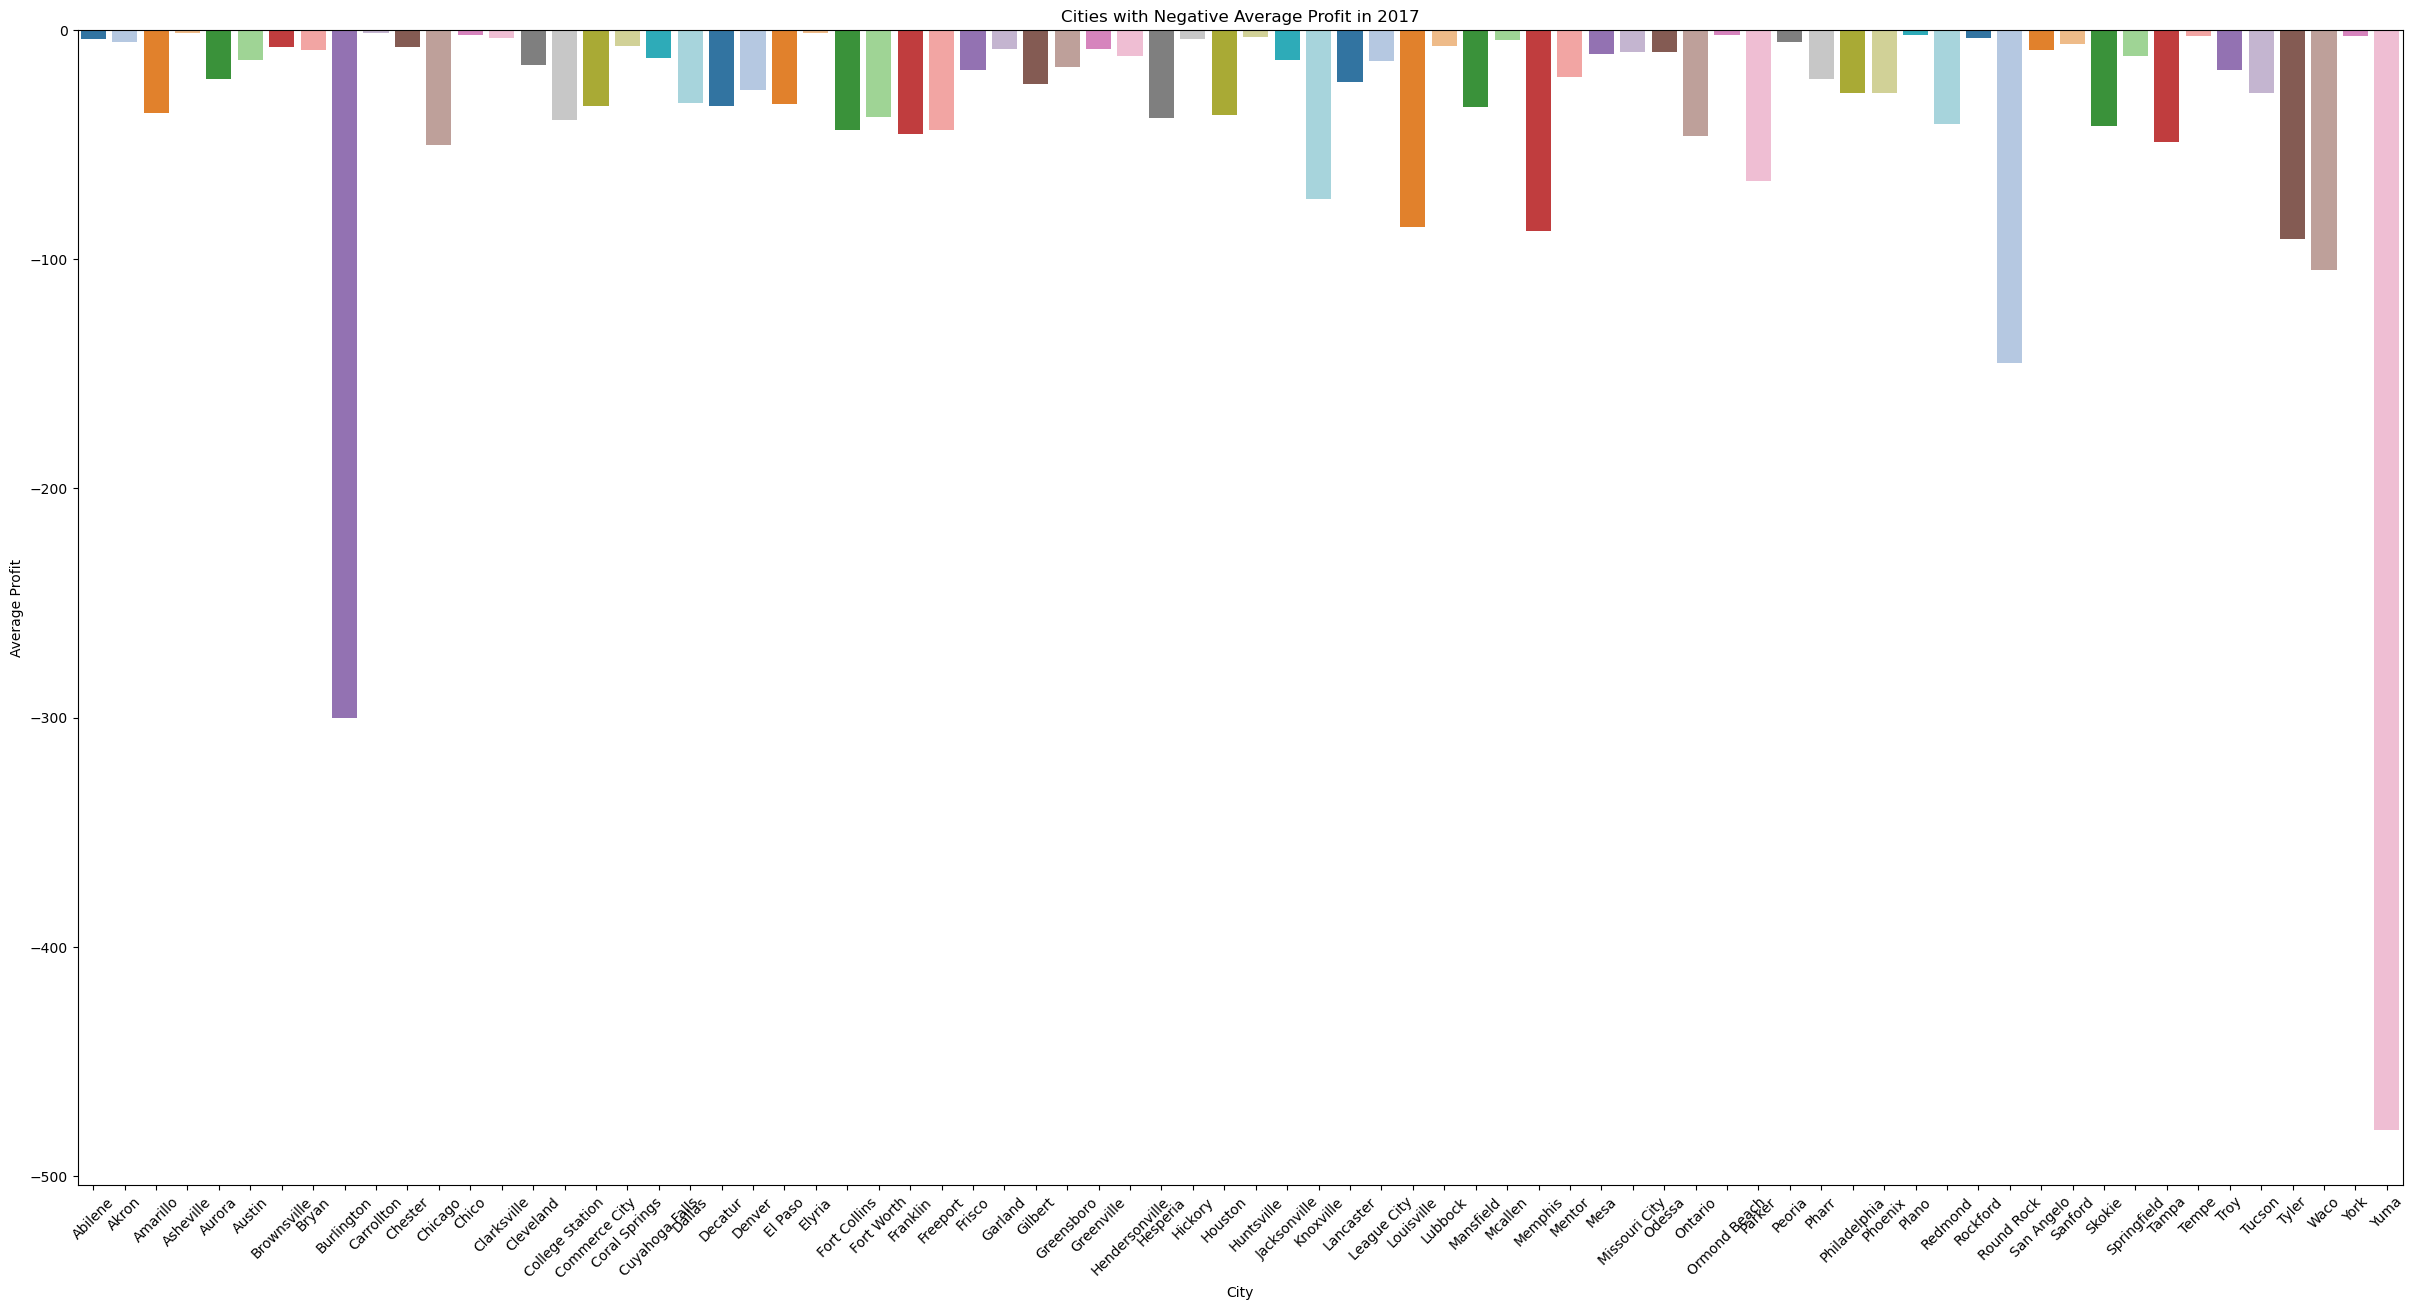

In [249]:
def plot_negative_profit_per_city(data, year):
    """
    Plots the average profit per city for a specified year, including only cities with a negative average profit.

    Parameters:
    - data (DataFrame): The dataset containing the sales data.
    - year (int): The year for which the negative profit per city is to be plotted.

    Returns:
    - None: Displays a matplotlib plot.
    """
    # Filter data for the specified year
    data_year = data[data['Year'] == year]

    # Calculate mean profit per city and filter for negative profits
    mean_profits = data_year.groupby('City')['Profit'].mean().reset_index()
    negative_profits = mean_profits[mean_profits['Profit'] < 0]

    # Plotting only if there are cities with negative profits
    if not negative_profits.empty:
        plt.figure(figsize=(30, 15))
        sns.barplot(x='City', y='Profit', data=negative_profits, palette='tab20')
        plt.title(f'Cities with Negative Average Profit in {year}')
        plt.ylabel('Average Profit')
        plt.xlabel('City')
        plt.xticks(rotation=45)
        plt.show()
    else:
        print(f"No cities with negative profit in {year}.")

# Example usage:
plot_negative_profit_per_city(data, 2017)

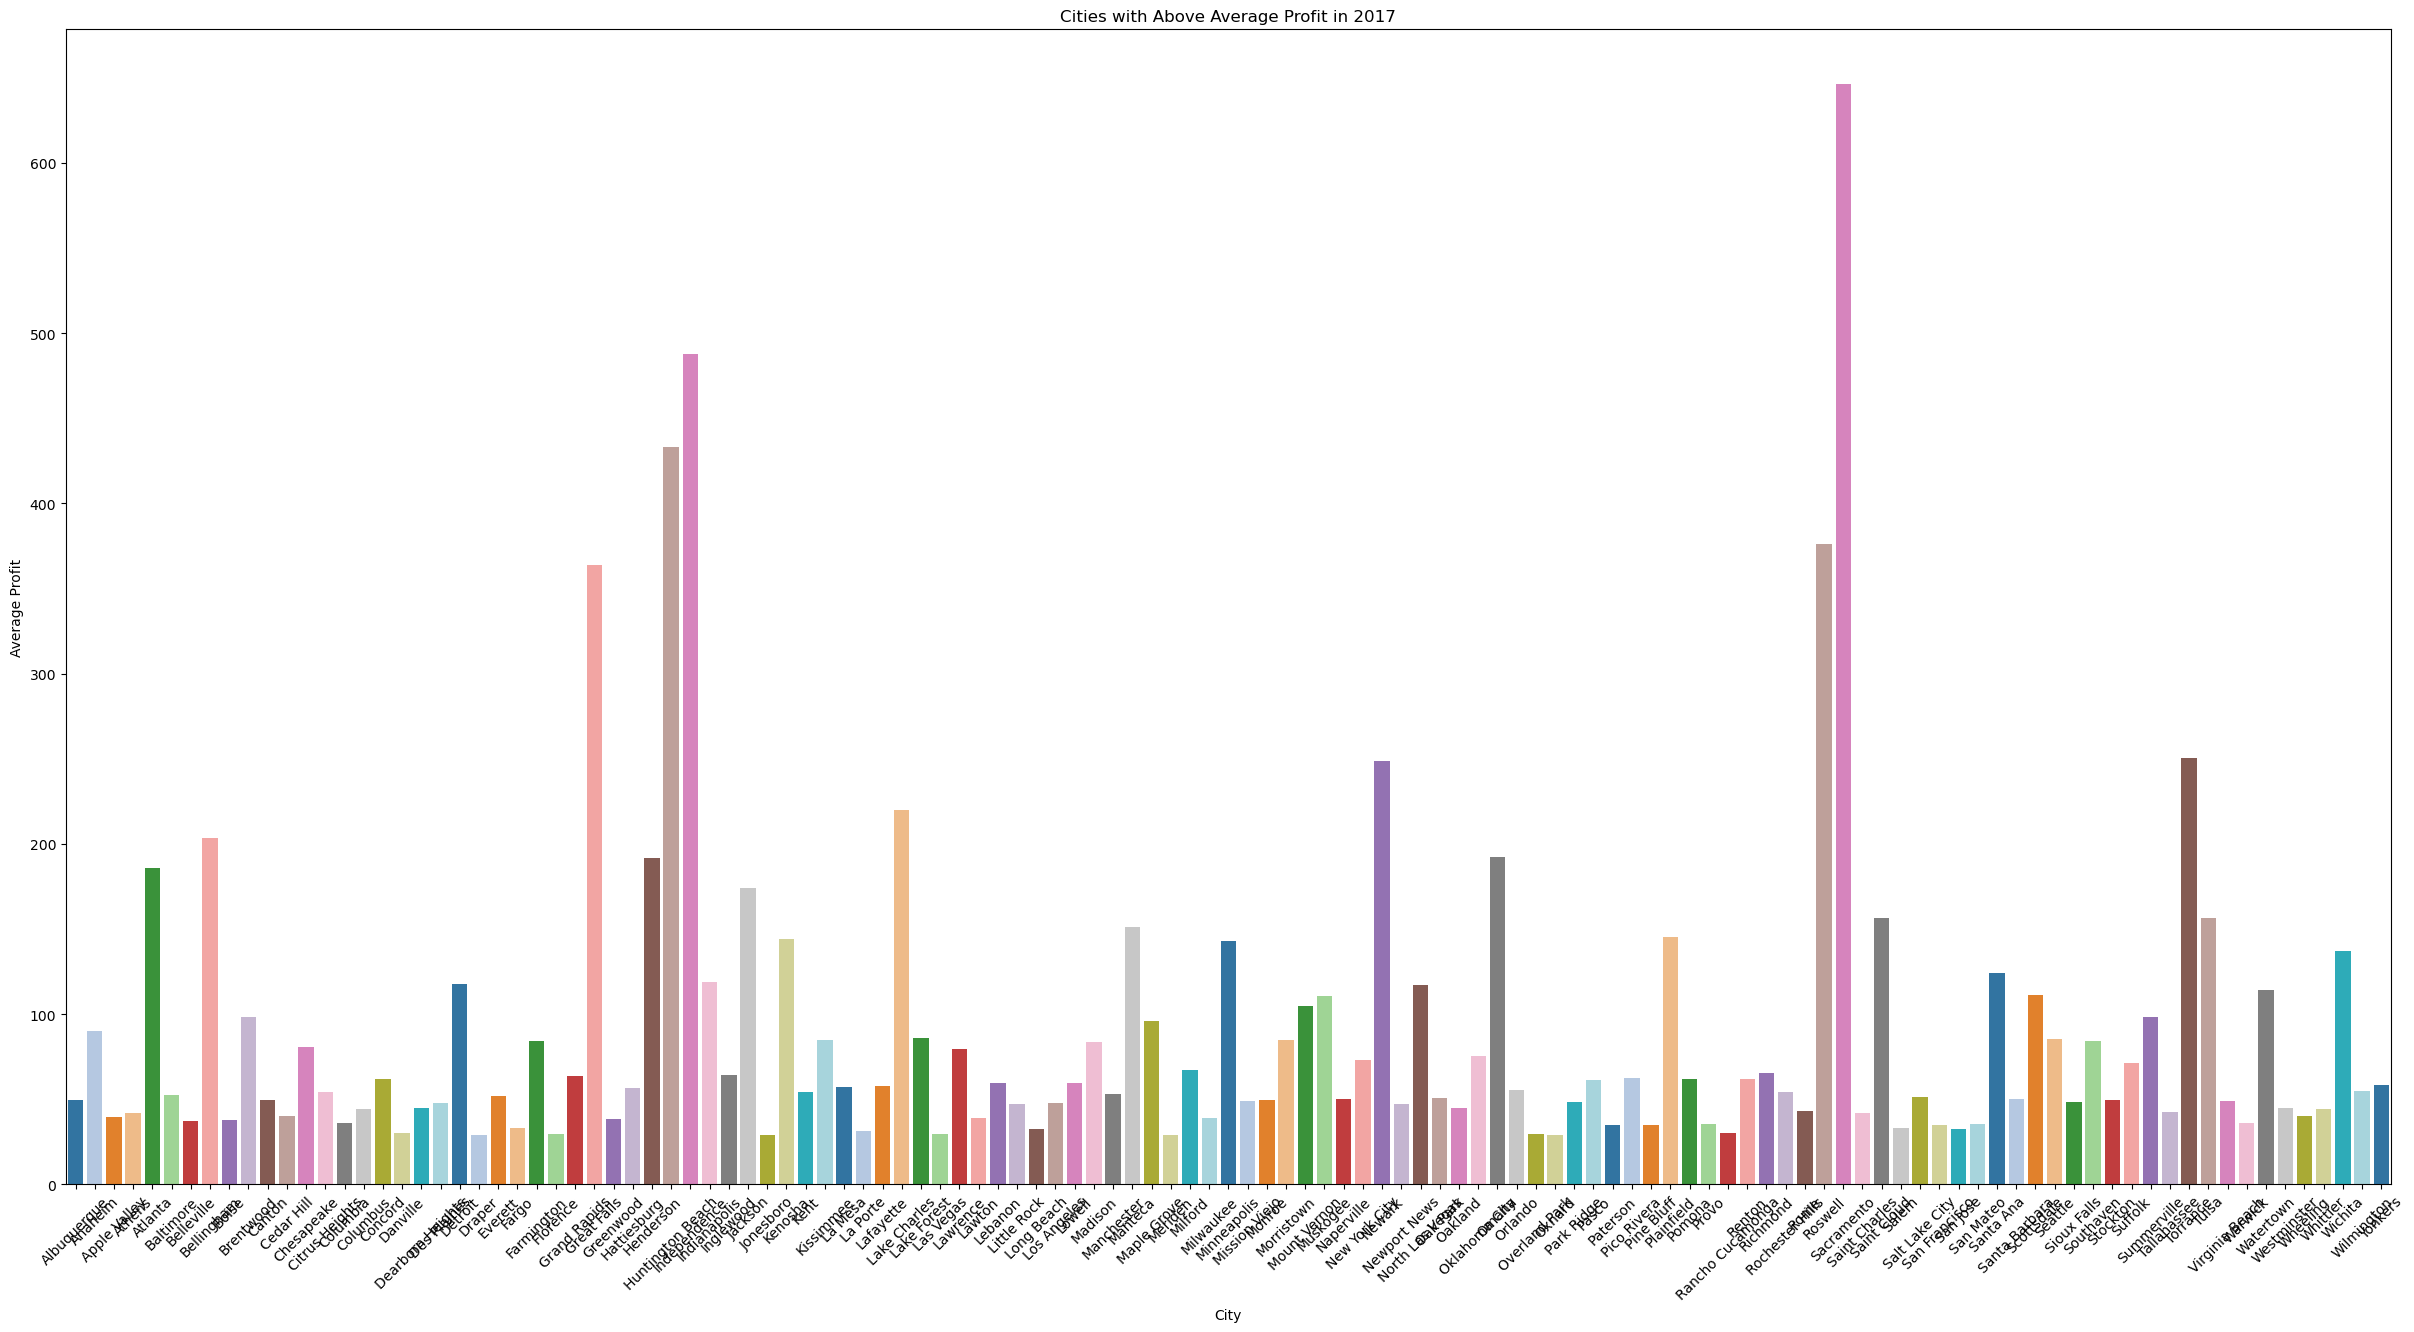

In [250]:
def plot_above_average_profit_per_city(data, year):
    """
    Plots the average profit per city for a specified year, including only cities with a higher than average profit.

    Parameters:
    - data (DataFrame): The dataset containing the sales data.
    - year (int): The year for which the above-average profit per city is to be plotted.

    Returns:
    - None: Displays a matplotlib plot.
    """
    # Filter data for the specified year
    data_year = data[data['Year'] == year]

    # Calculate mean profit per city
    mean_profits = data_year.groupby('City')['Profit'].mean().reset_index()
    
    # Calculate the overall average profit for the year
    overall_average_profit = mean_profits['Profit'].mean()

    # Filter for cities with profits above the overall average
    above_average_profits = mean_profits[mean_profits['Profit'] > overall_average_profit]

    # Plotting only if there are cities with above-average profits
    if not above_average_profits.empty:
        plt.figure(figsize=(30, 15))
        sns.barplot(x='City', y='Profit', data=above_average_profits, palette='tab20')
        plt.title(f'Cities with Above Average Profit in {year}')
        plt.ylabel('Average Profit')
        plt.xlabel('City')
        plt.xticks(rotation=45)
        plt.show()
    else:
        print(f"No cities with above average profit in {year}.")

# Example usage:
plot_above_average_profit_per_city(data, 2017)

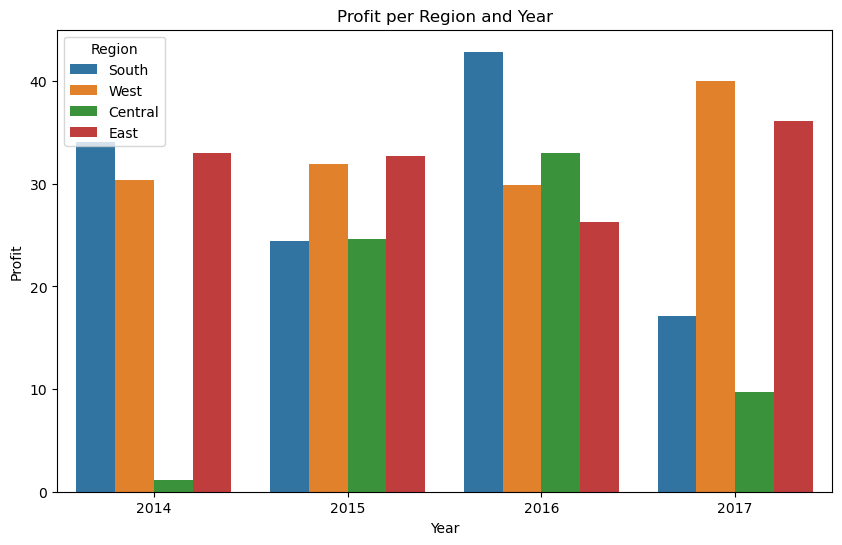

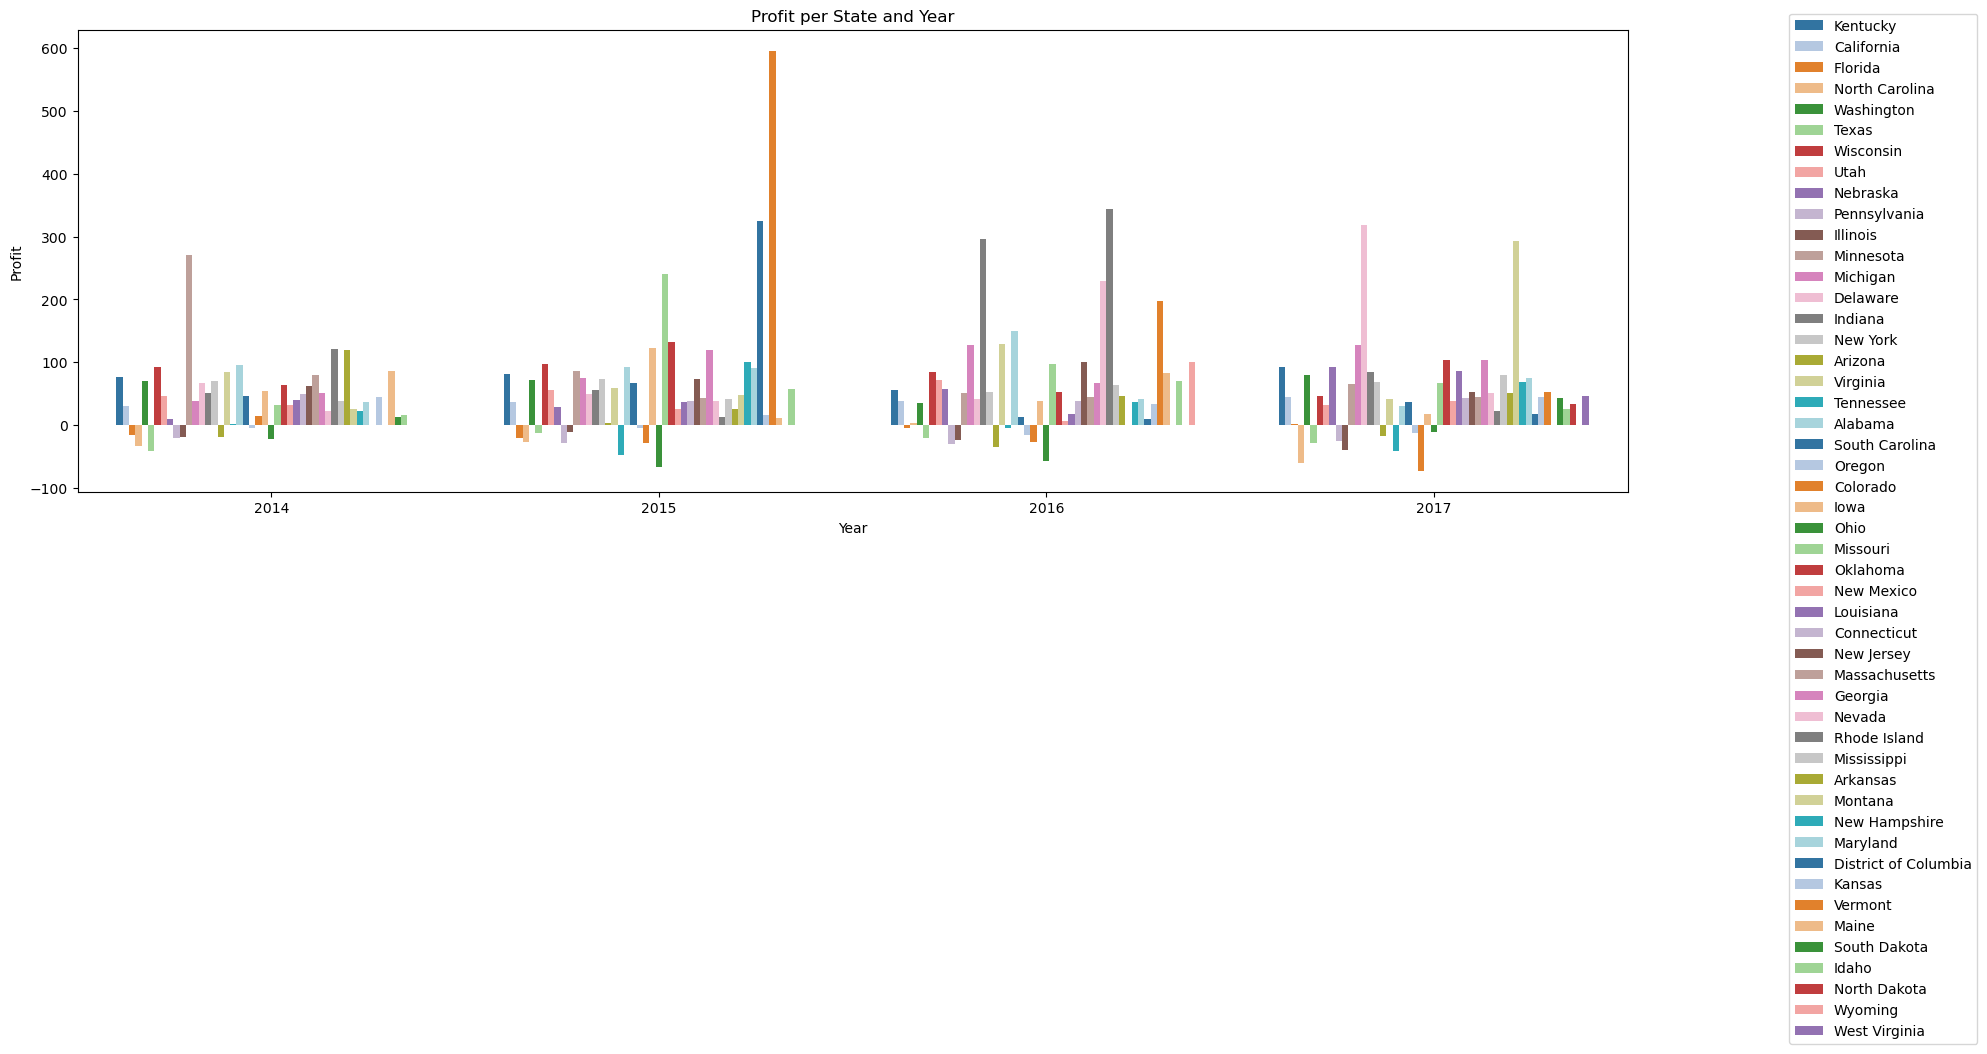

In [233]:
# Visualization: Profit per region and year
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Profit', data=data, hue='Region', estimator=np.mean, errorbar=None)
plt.title('Profit per Region and Year')
plt.ylabel('Profit')
plt.xlabel('Year')
#plt.xticks(rotation=45)
plt.show()

# Visualization: Profit per state and year
plt.figure(figsize=(20, 6))
sns.barplot(x='Year', y='Profit', data=data, hue='State', estimator=np.mean, errorbar=None, palette='tab20')
plt.title('Profit per State and Year')
plt.ylabel('Profit')
plt.xlabel('Year')
plt.legend(bbox_to_anchor=(1.1, 1.05))
#plt.xticks(rotation=45)
plt.show()

Correlation Matrix:
                     Discount     Sales    Profit  Adjusted Unit Price
Discount             1.000000 -0.028190 -0.219487             0.072989
Sales               -0.028190  1.000000  0.479064             0.856567
Profit              -0.219487  0.479064  1.000000             0.204591
Adjusted Unit Price  0.072989  0.856567  0.204591             1.000000


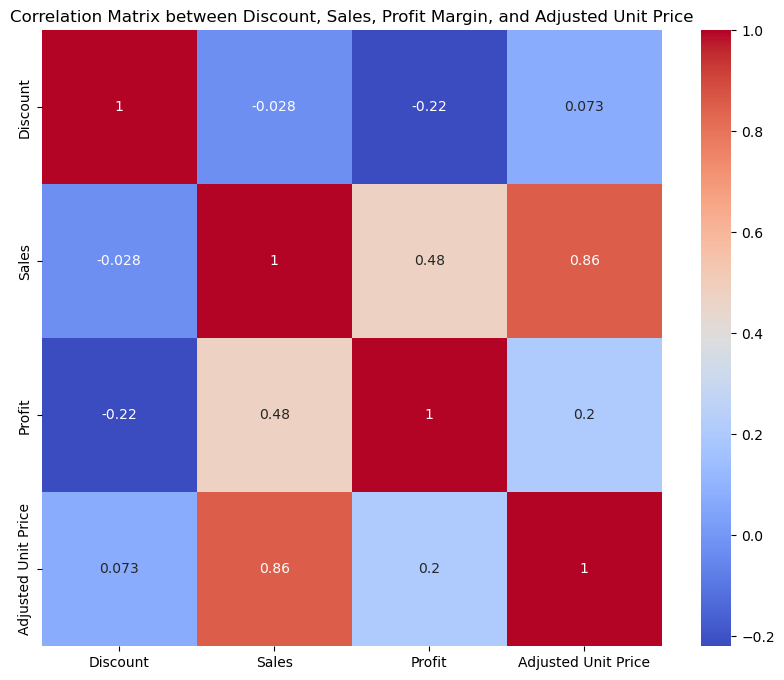

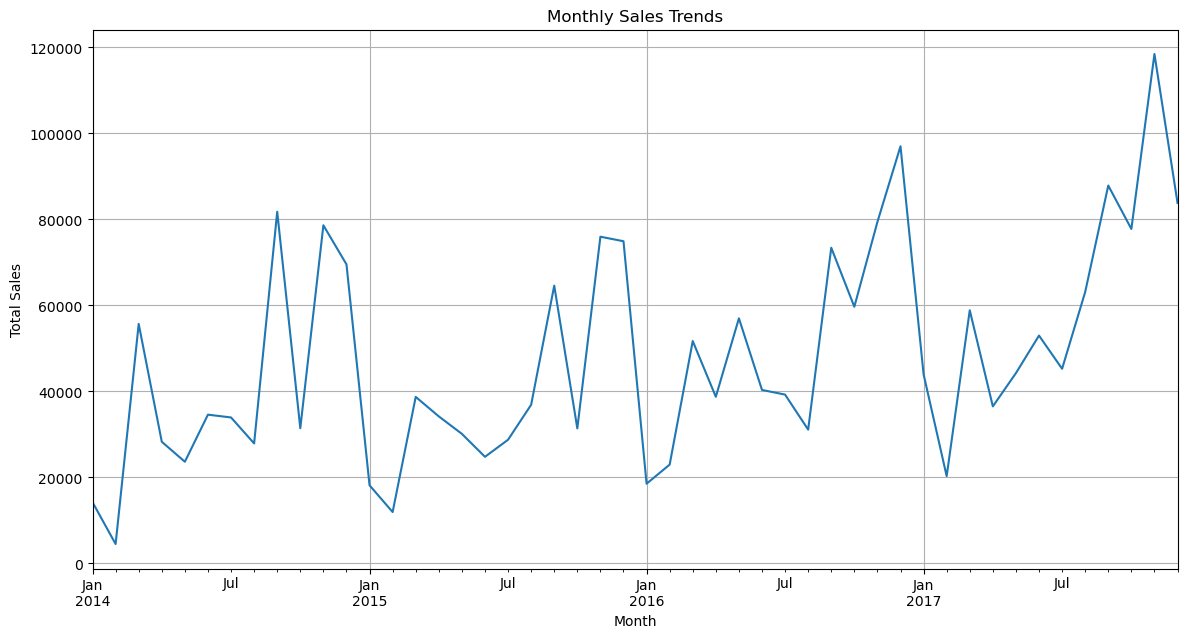

In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Calculate the adjusted unit price after discounts
data['Adjusted Unit Price'] = (data['Sales'] / data['Quantity']) / (1 - data['Discount'])

# Analyze correlations
correlation_data = data[['Discount', 'Sales', 'Profit', 'Adjusted Unit Price']]
correlation_matrix = correlation_data.corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Visualization of Correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix between Discount, Sales, Profit Margin, and Adjusted Unit Price')
plt.show()

# Time-based Analysis: Sales Trends Over Time
# Aggregating sales by month and year
data['Year-Month'] = data['Order Date'].dt.to_period('M')
monthly_sales = data.groupby('Year-Month')['Sales'].sum()

plt.figure(figsize=(14, 7))
monthly_sales.plot()
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

# 1. Customer Segmentation Analysis

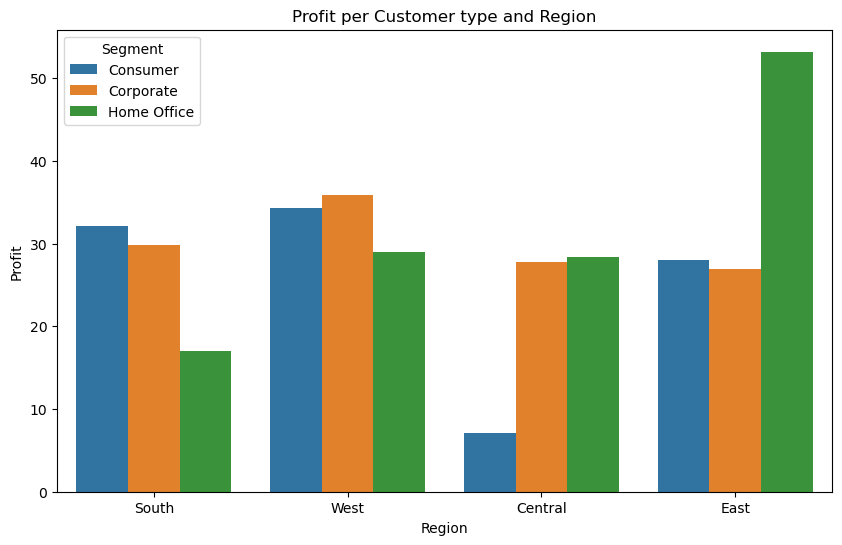

In [255]:
# Visualization: Profit per customer type
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Profit', data=data, hue='Segment', estimator=np.mean, errorbar=None)
plt.title('Profit per Customer type and Region')
plt.ylabel('Profit')
plt.xlabel('Region')
#plt.xticks(rotation=45)
plt.show()

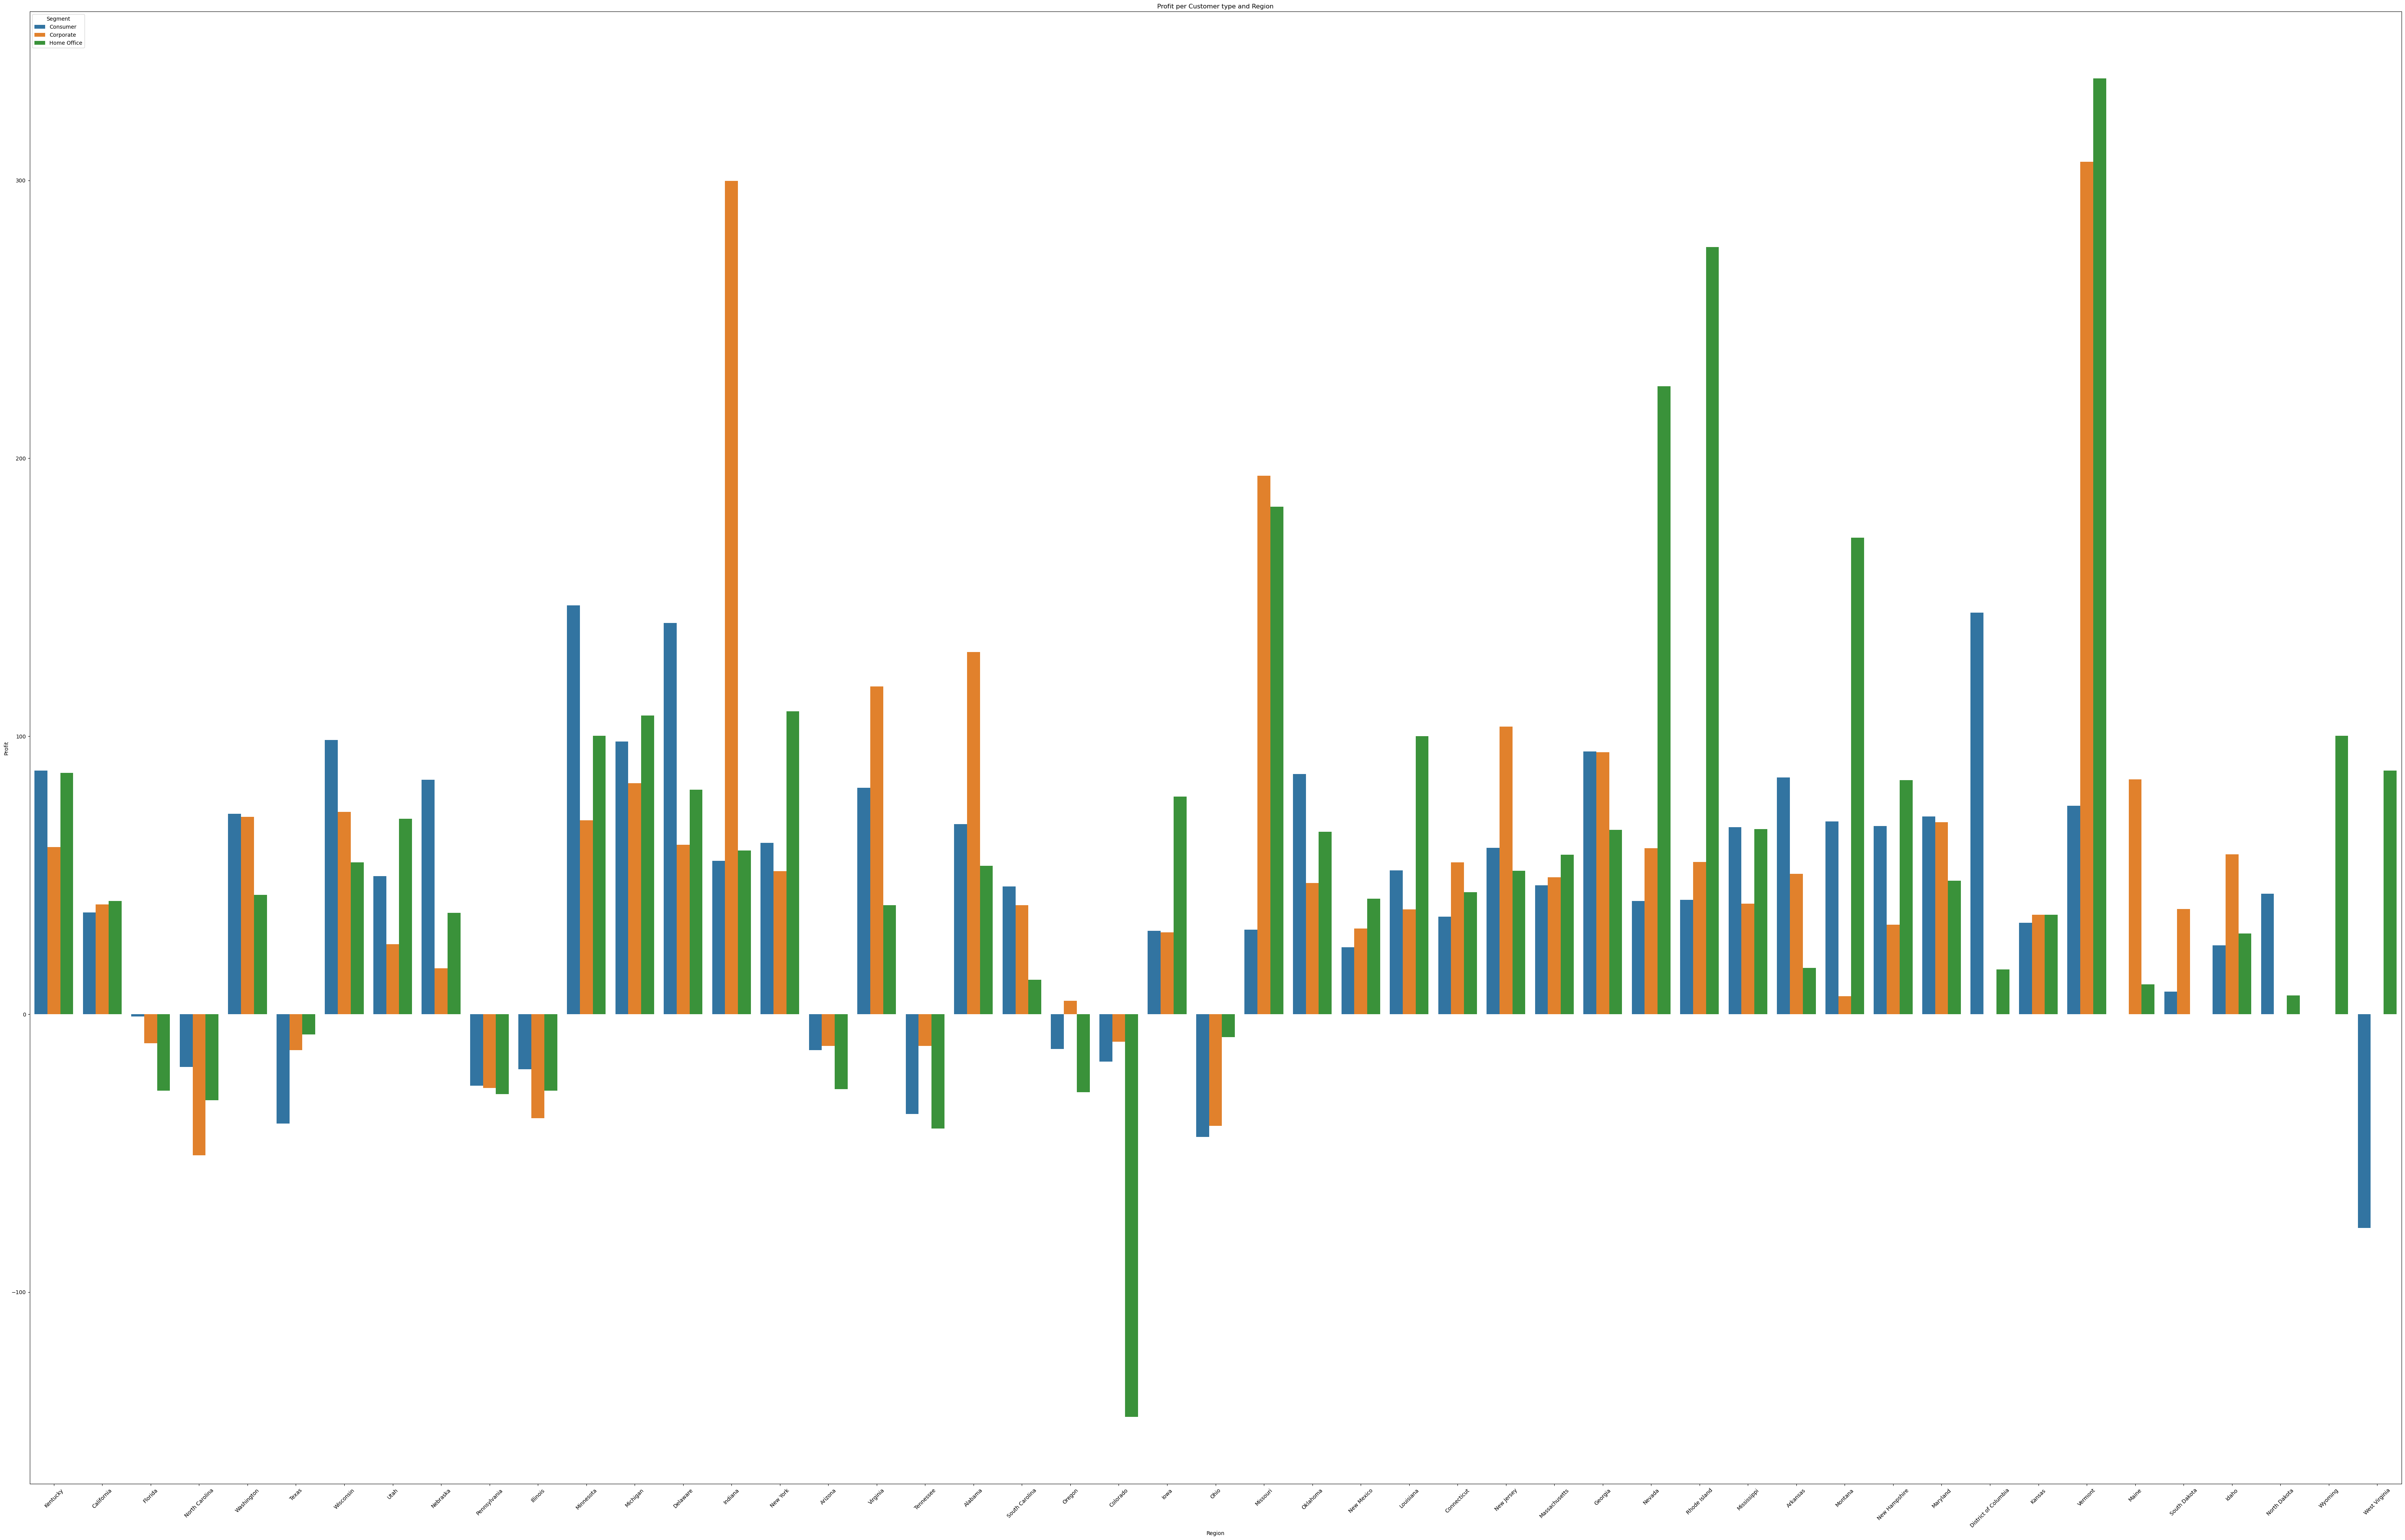

In [259]:
# Visualization: Profit per customer type
plt.figure(figsize=(80, 50))
sns.barplot(x='State', y='Profit', data=data, hue='Segment', estimator=np.mean, errorbar=None)
plt.title('Profit per Customer type and Region')
plt.ylabel('Profit')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.show()

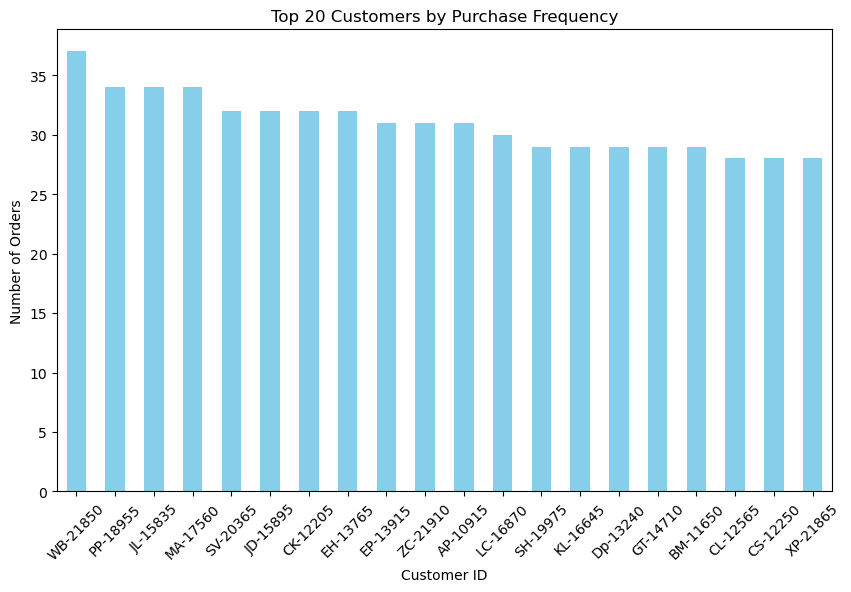

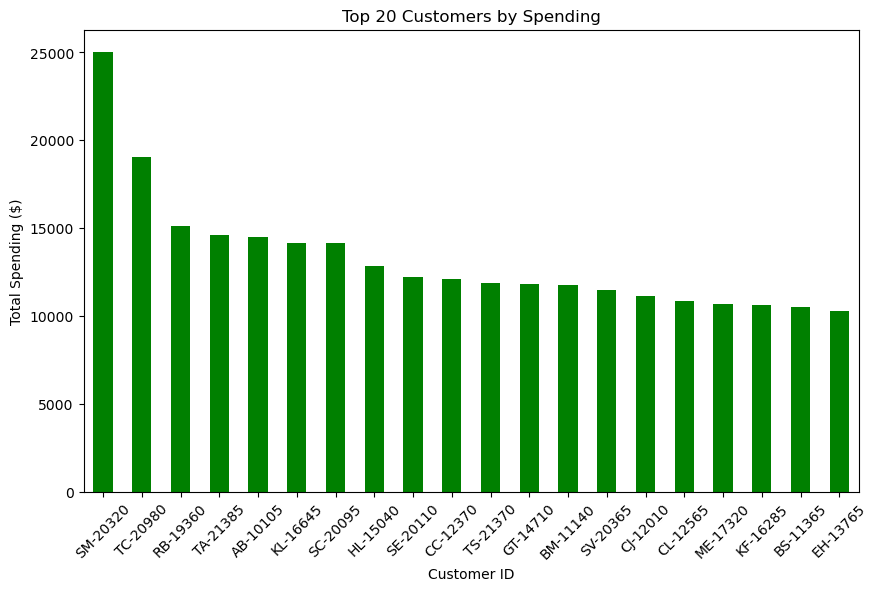

In [263]:
# Analysis 1: Frequency of Purchases
# Counting the number of orders per customer
order_frequency = data.groupby('Customer ID')['Order ID'].count().sort_values(ascending=False)

# Plotting frequency of purchases
plt.figure(figsize=(10, 6))
order_frequency.head(20).plot(kind='bar', color='skyblue')  # Top 20 customers by order frequency
plt.title('Top 20 Customers by Purchase Frequency')
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

# Analysis 2: Spending Patterns
# Total spending per customer
customer_spending = data.groupby('Customer ID')['Sales'].sum().sort_values(ascending=False)

# Plotting spending patterns
plt.figure(figsize=(10, 6))
customer_spending.head(20).plot(kind='bar', color='green')  # Top 20 customers by spending
plt.title('Top 20 Customers by Spending')
plt.xlabel('Customer ID')
plt.ylabel('Total Spending ($)')
plt.xticks(rotation=45)
plt.show()

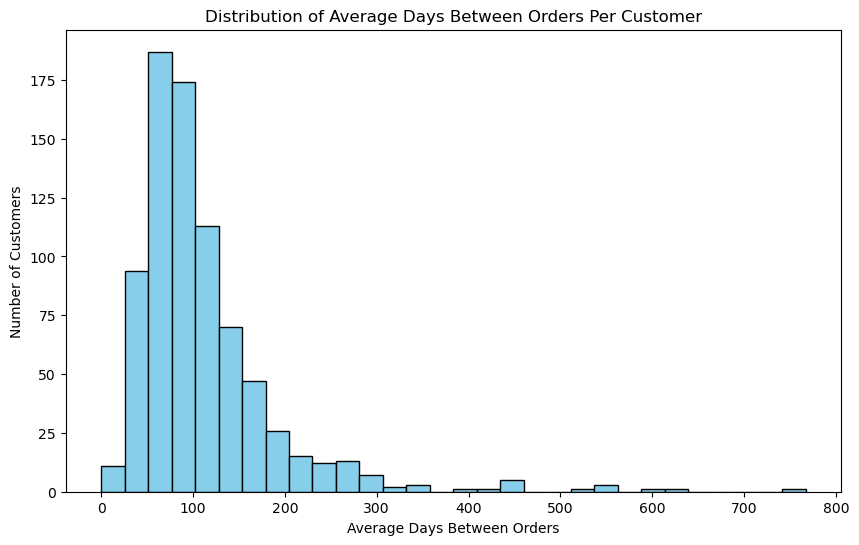

In [265]:
# Sorting data by customer and order date to ensure chronological order for calculations
data_sorted = data.sort_values(['Customer ID','Order Date'])

# Calculate the time differences between purchases for each customer
data_sorted['Time Between Orders'] = data_sorted.groupby('Customer ID')['Order Date'].diff()

# Convert time differences to a number of days
data_sorted['Days Between Orders'] = data_sorted['Time Between Orders'].dt.days

# Compute the average days between orders for each customer
average_days_between_orders = data_sorted.groupby('Customer ID')['Days Between Orders'].mean().dropna()

# Plotting the average days between orders
plt.figure(figsize=(10, 6))
average_days_between_orders.hist(bins=30, edgecolor='black', color='skyblue')
plt.title('Distribution of Average Days Between Orders Per Customer')
plt.xlabel('Average Days Between Orders')
plt.ylabel('Number of Customers')
plt.grid(False)
plt.show()

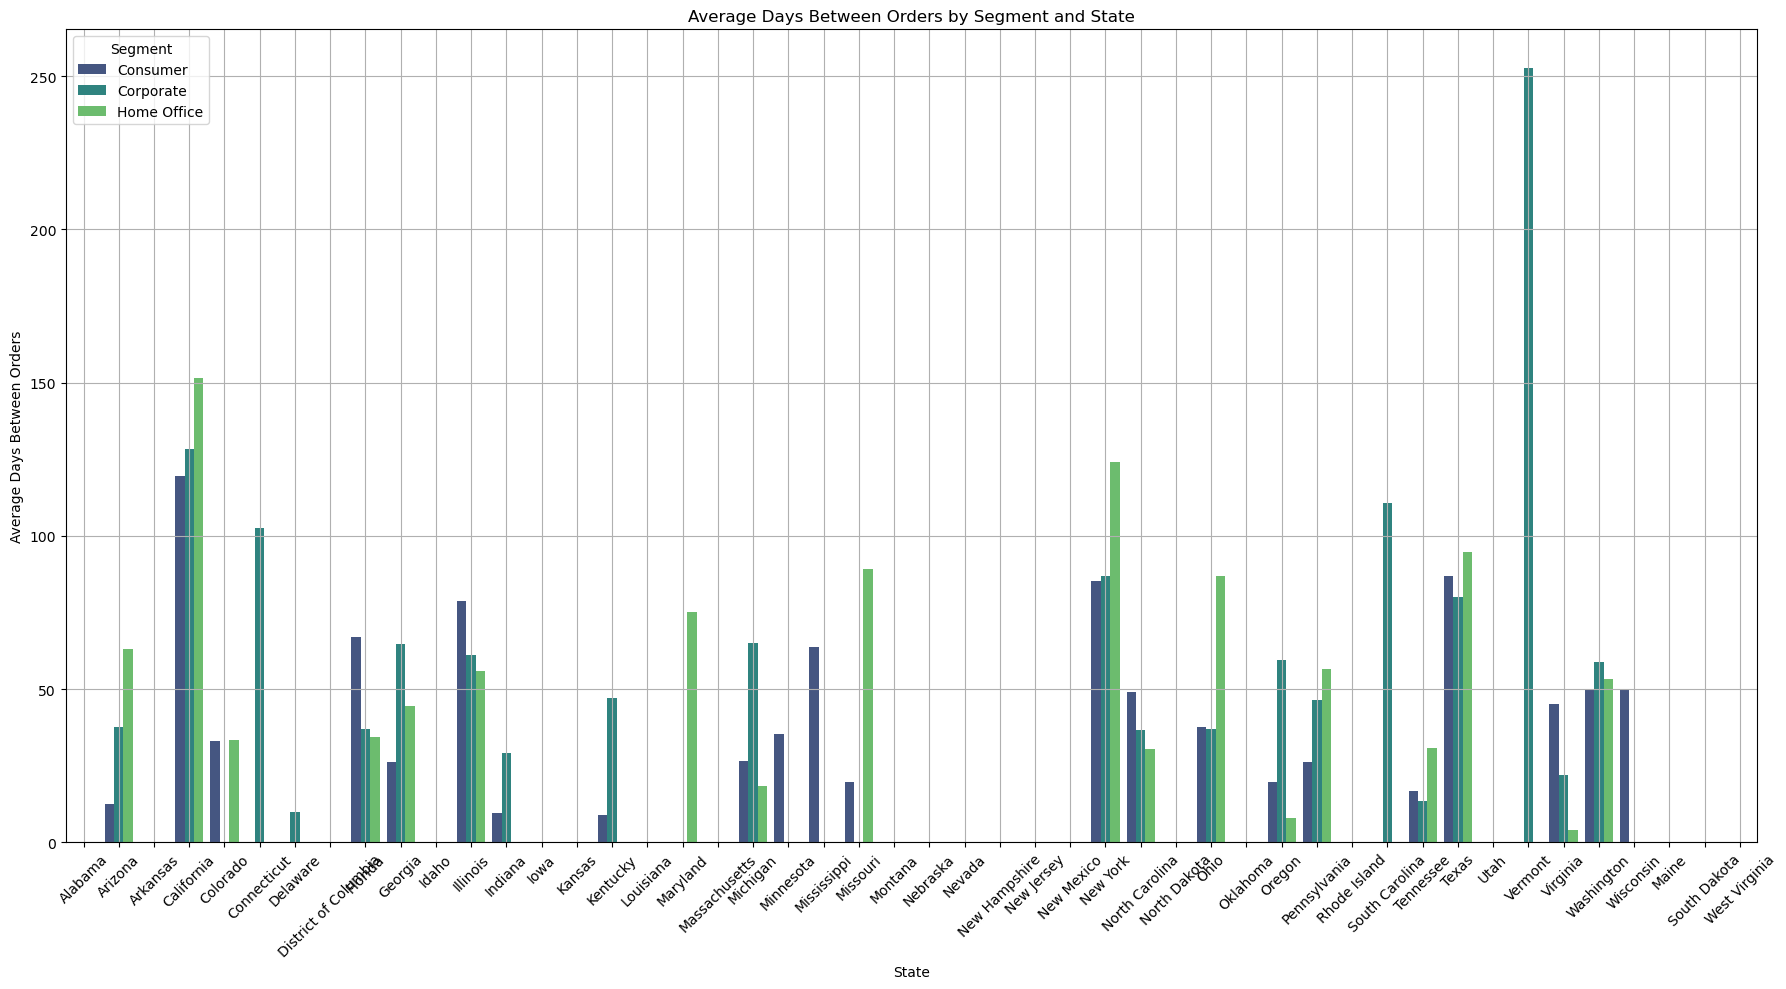

In [268]:
# Sorting data by customer, segment, state, and order date to ensure chronological order for calculations
data_sorted = data.sort_values(['Customer ID', 'Segment', 'State', 'Order Date'])

# Calculate the time differences between purchases for each customer within each segment and state
data_sorted['Time Between Orders'] = data_sorted.groupby(['Customer ID', 'Segment', 'State'])['Order Date'].diff()

# Convert time differences to a number of days
data_sorted['Days Between Orders'] = data_sorted['Time Between Orders'].dt.days

# Compute the average days between orders for each segment and state
average_days_between_orders = data_sorted.groupby(['Segment', 'State'])['Days Between Orders'].mean().dropna().reset_index()

# Visualization using seaborn
plt.figure(figsize=(18, 10))
plot = sns.barplot(data=average_days_between_orders, x='State', y='Days Between Orders', hue='Segment', palette='viridis')
plt.title('Average Days Between Orders by Segment and State')
plt.xlabel('State')
plt.ylabel('Average Days Between Orders')
plt.xticks(rotation=45)
plt.legend(title='Segment')
plt.grid(True)

# Optional: Improve layout to avoid label overlap
plt.tight_layout()
plt.show()

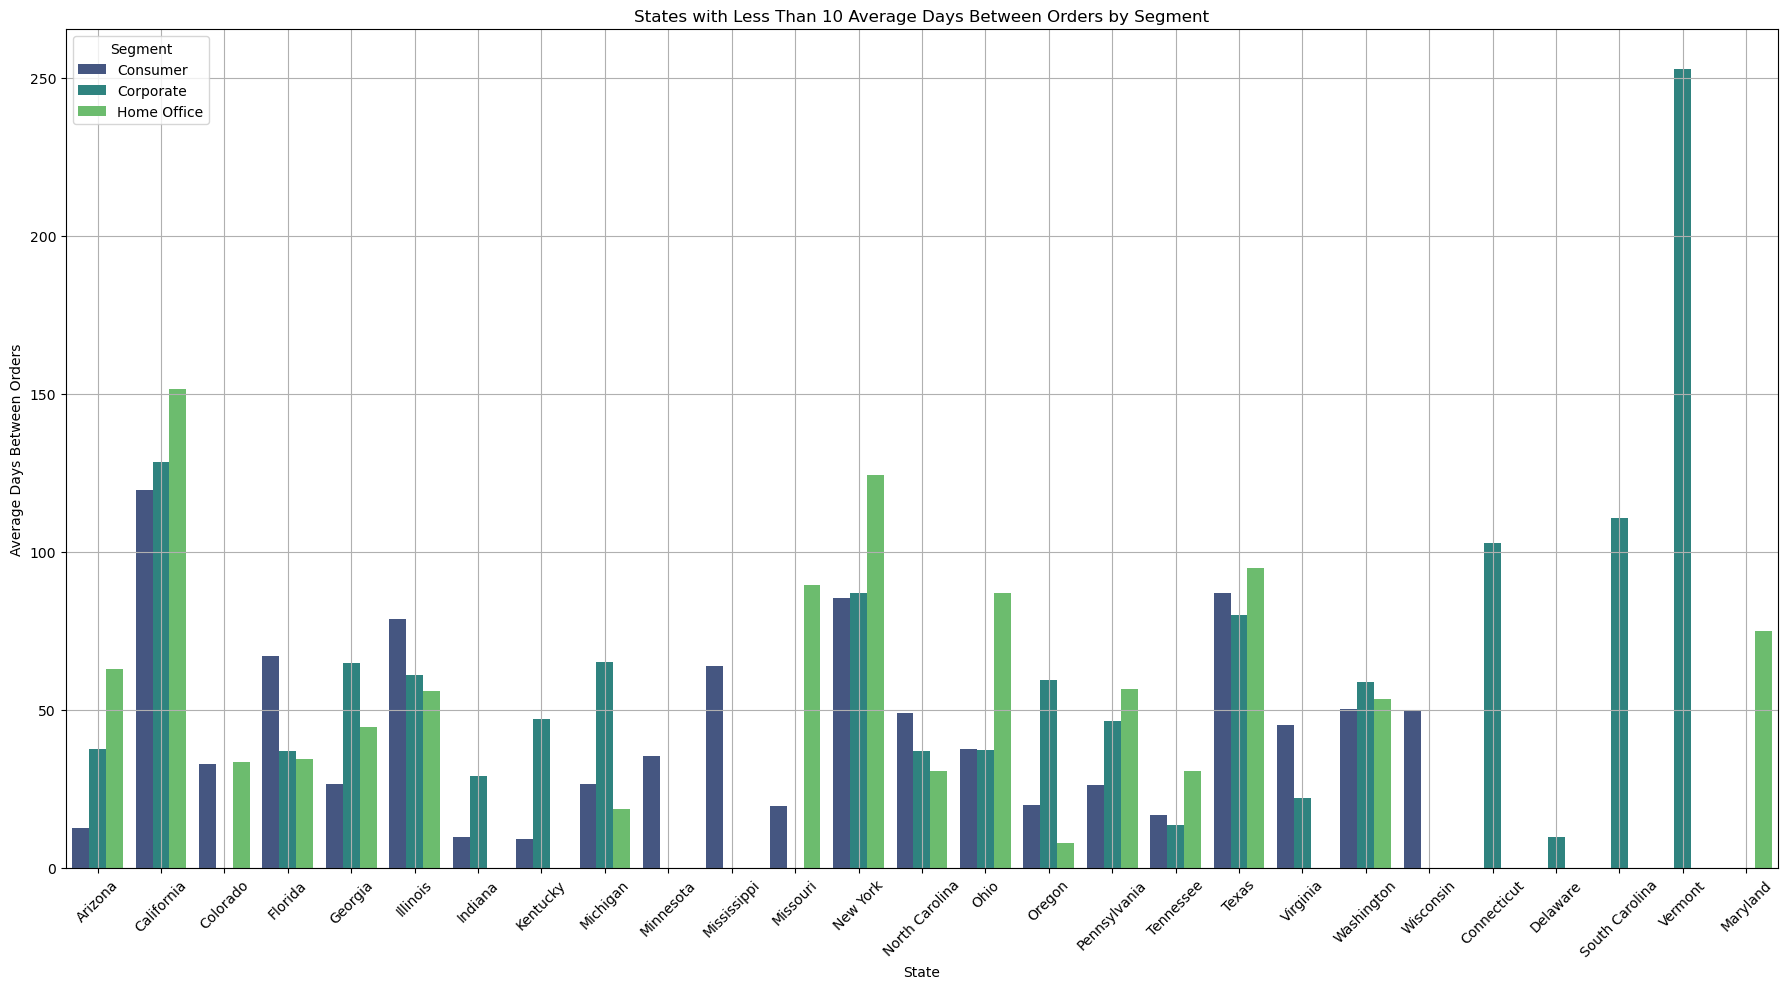

In [280]:
# Sorting data by customer, segment, state, and order date to ensure chronological order for calculations
data_sorted = data.sort_values(['Customer ID', 'Segment', 'State', 'Order Date'])

# Calculate the time differences between purchases for each customer within each segment and state
data_sorted['Time Between Orders'] = data_sorted.groupby(['Customer ID', 'Segment', 'State'])['Order Date'].diff()

# Convert time differences to a number of days
data_sorted['Days Between Orders'] = data_sorted['Time Between Orders'].dt.days

# Compute the average days between orders for each segment and state
average_days_between_orders = data_sorted.groupby(['Segment', 'State'])['Days Between Orders'].mean().dropna().reset_index()

# Filter for states and segments where the average days between orders are less than 10
filtered_data = average_days_between_orders[average_days_between_orders['Days Between Orders'] > 5]

# Visualization using seaborn
plt.figure(figsize=(18, 10))
plot = sns.barplot(data=filtered_data, x='State', y='Days Between Orders', hue='Segment', palette='viridis')
plt.title('States with Less Than 10 Average Days Between Orders by Segment')
plt.xlabel('State')
plt.ylabel('Average Days Between Orders')
plt.xticks(rotation=45)
plt.legend(title='Segment')
plt.grid(True)

# Optional: Improve layout to avoid label overlap
plt.tight_layout()
plt.show()

## Product Performance
### Best-selling Products: Identify which products are selling the most in terms of quantity and which are generating the most revenue.
### Product Profitability: Analyze which products have the highest profit margins and which are underperforming.

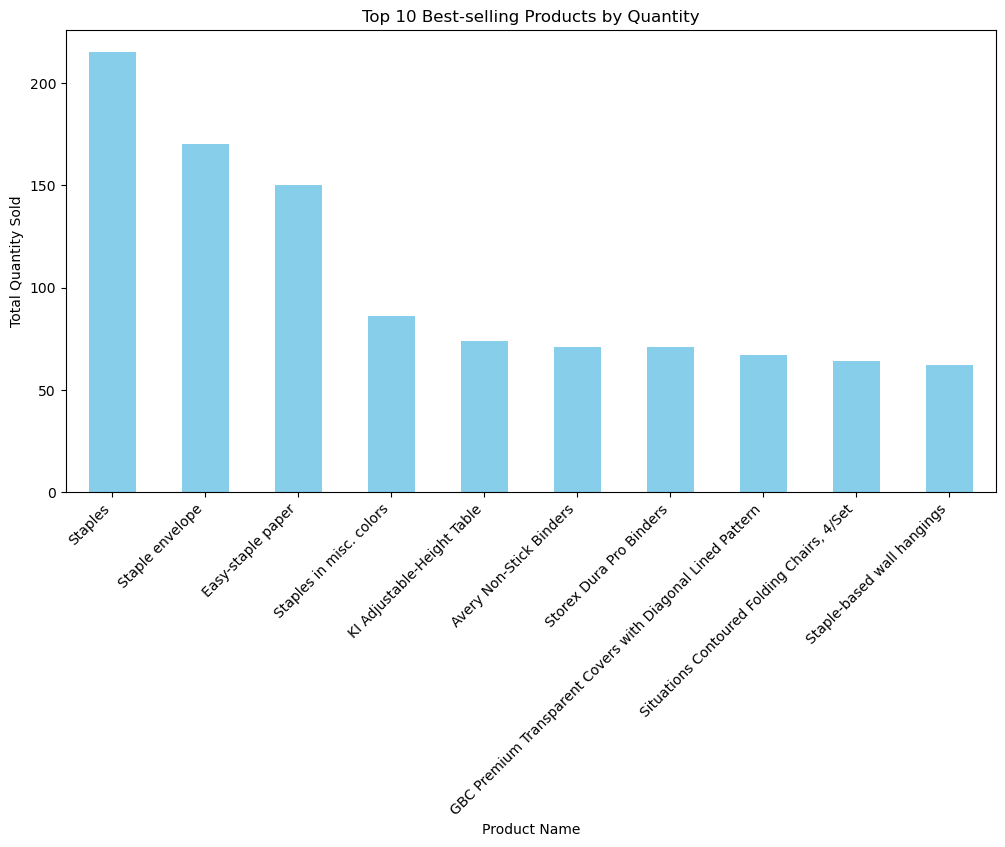

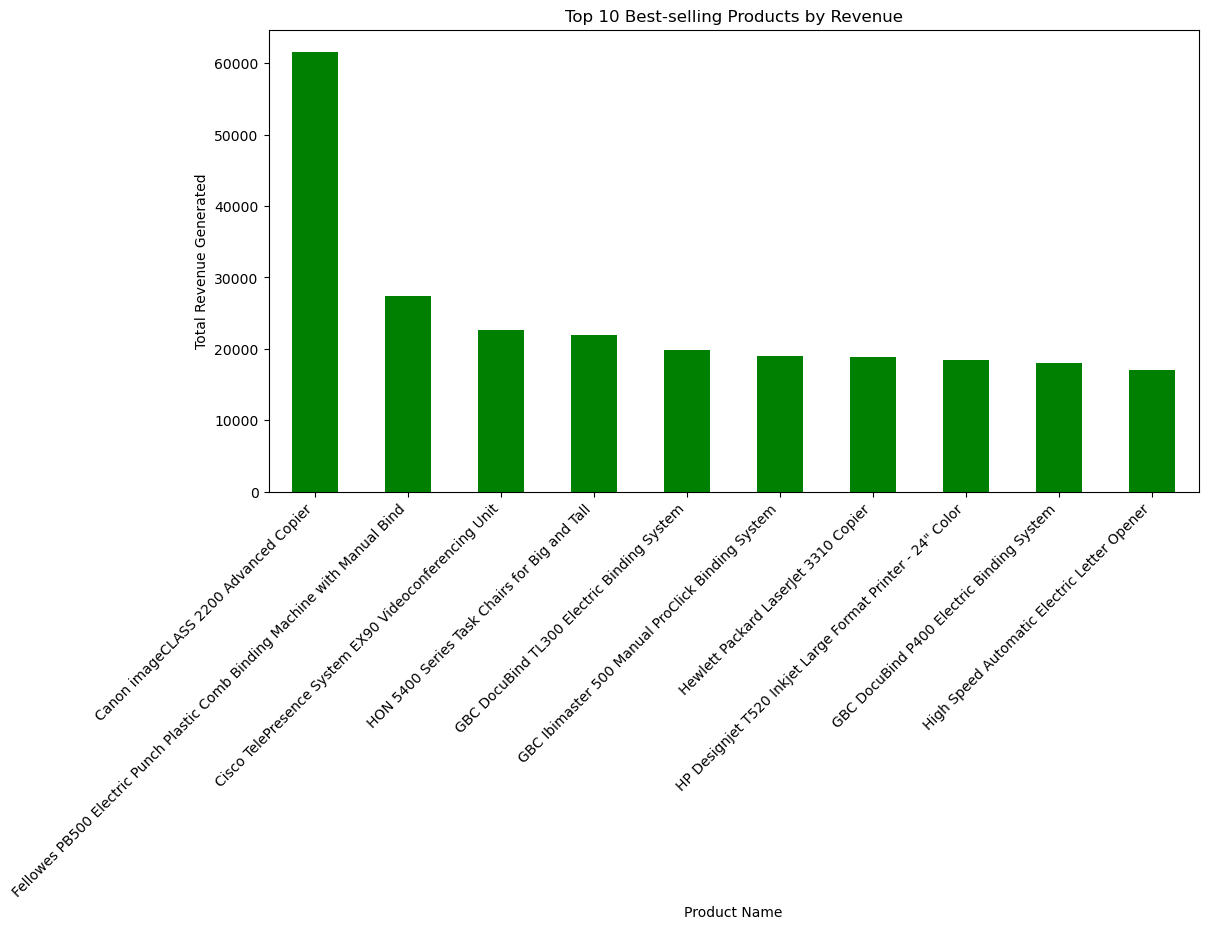

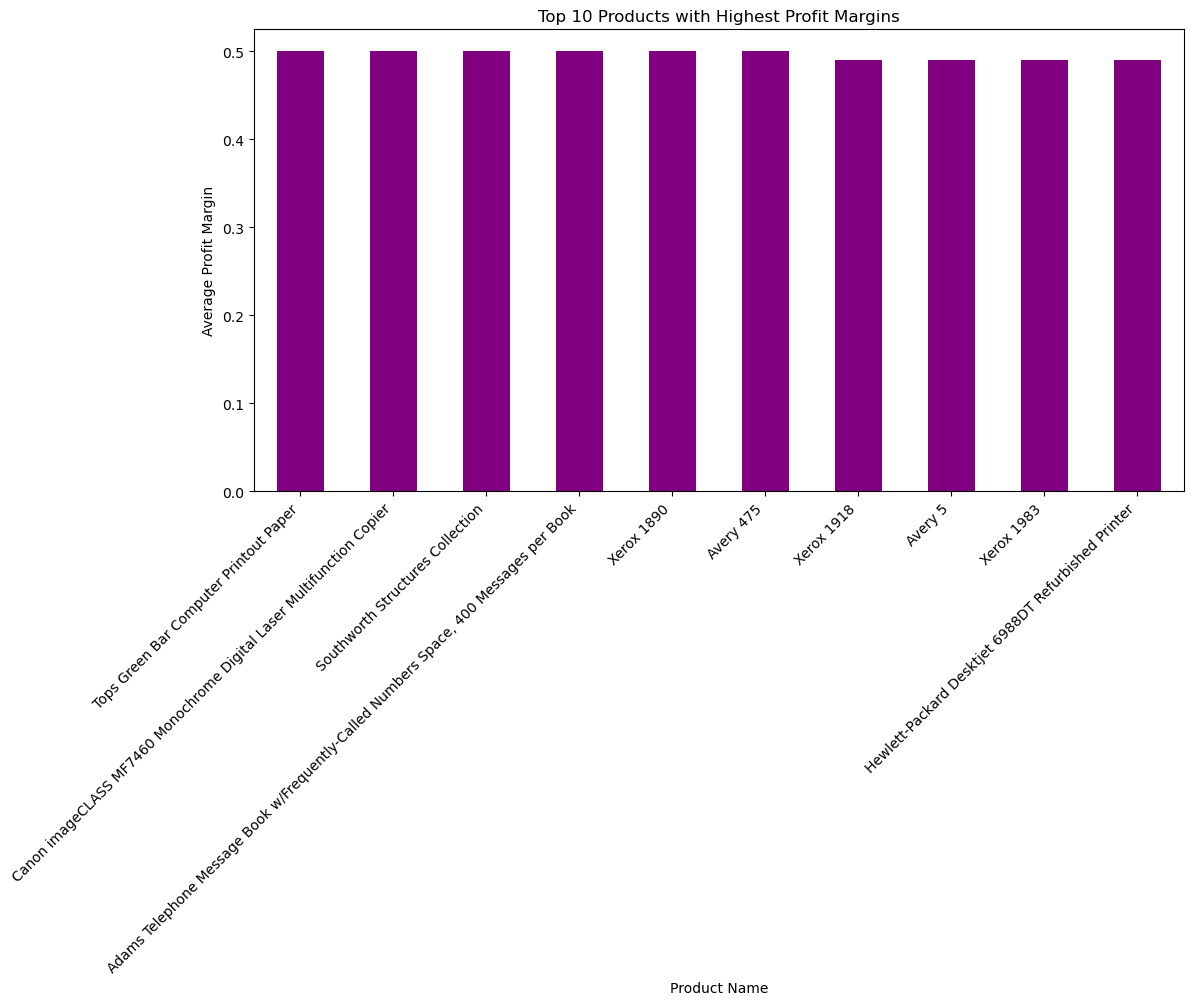

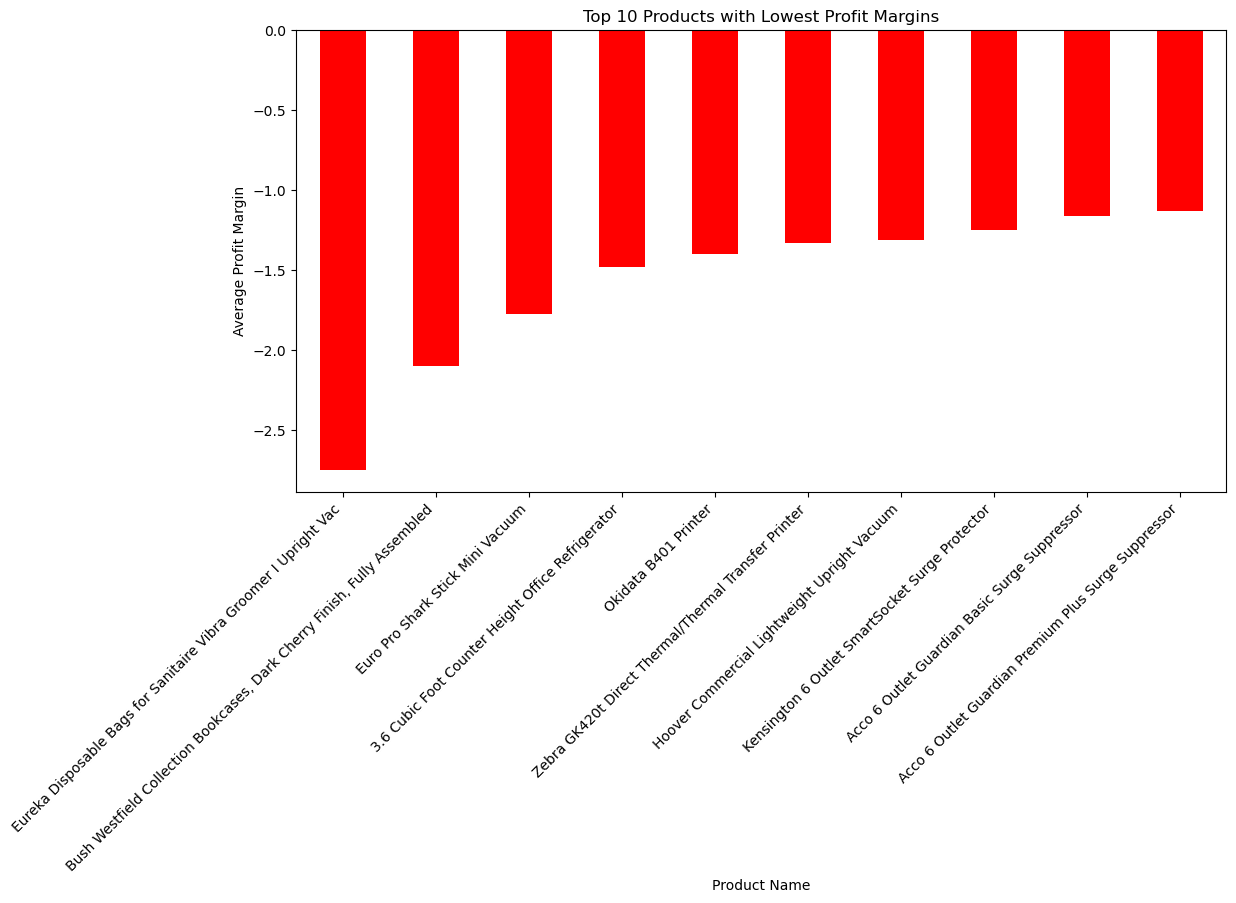

In [281]:
# Analysis 1: Best-selling Products by Quantity and Revenue
# Summing quantity sold and total sales for each product
product_sales = data.groupby('Product Name').agg({
    'Quantity': 'sum',
    'Sales': 'sum'
}).sort_values(by='Sales', ascending=False)

# Top 10 products by quantity sold
top_products_by_quantity = product_sales.sort_values(by='Quantity', ascending=False).head(10)

# Top 10 products by revenue
top_products_by_revenue = product_sales.head(10)

# Plotting top products by quantity
plt.figure(figsize=(12, 6))
top_products_by_quantity['Quantity'].plot(kind='bar', color='skyblue')
plt.title('Top 10 Best-selling Products by Quantity')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.show()

# Plotting top products by revenue
plt.figure(figsize=(12, 6))
top_products_by_revenue['Sales'].plot(kind='bar', color='green')
plt.title('Top 10 Best-selling Products by Revenue')
plt.xlabel('Product Name')
plt.ylabel('Total Revenue Generated')
plt.xticks(rotation=45, ha='right')
plt.show()

# Analysis 2: Product Profitability
# Calculating profit margin for each product
data['Profit Margin'] = data['Profit'] / data['Sales']
product_profitability = data.groupby('Product Name')['Profit Margin'].mean().dropna()

# Products with the highest profit margins
highest_profit_margins = product_profitability.sort_values(ascending=False).head(10)

# Products with the lowest profit margins
lowest_profit_margins = product_profitability.sort_values().head(10)

# Plotting products with the highest profit margins
plt.figure(figsize=(12, 6))
highest_profit_margins.plot(kind='bar', color='purple')
plt.title('Top 10 Products with Highest Profit Margins')
plt.xlabel('Product Name')
plt.ylabel('Average Profit Margin')
plt.xticks(rotation=45, ha='right')
plt.show()

# Plotting products with the lowest profit margins
plt.figure(figsize=(12, 6))
lowest_profit_margins.plot(kind='bar', color='red')
plt.title('Top 10 Products with Lowest Profit Margins')
plt.xlabel('Product Name')
plt.ylabel('Average Profit Margin')
plt.xticks(rotation=45, ha='right')
plt.show()